In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Startups Data

In [2]:
df = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\50_Startups.csv")

In [3]:
df.shape

(50, 5)

In [4]:
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

### Descriptive Statistics

In [7]:
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [8]:
col = ['R&D Spend','Administration','Marketing Spend','Profit']

<Axes: >

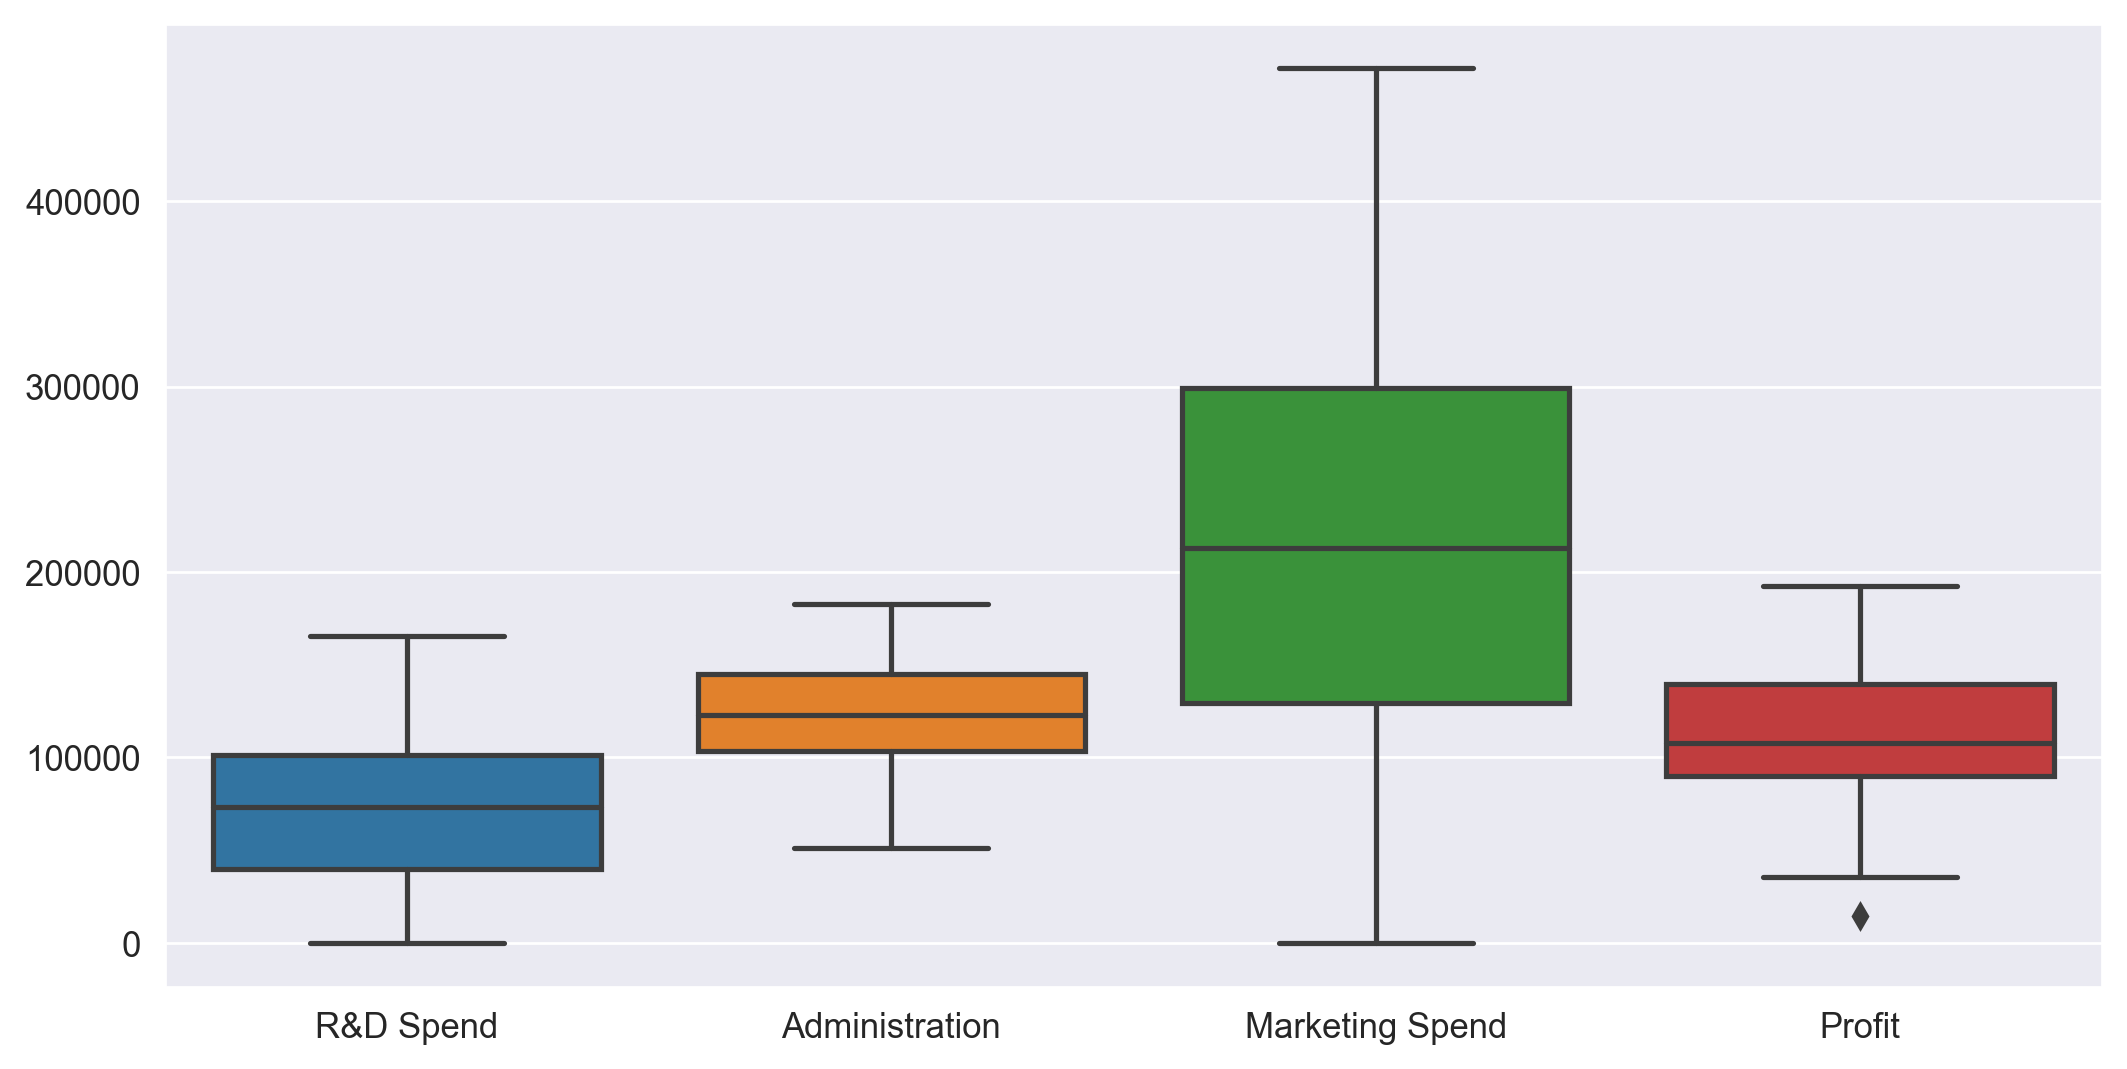

In [9]:
sns.boxplot(df)

<Axes: xlabel='R&D Spend', ylabel='Density'>

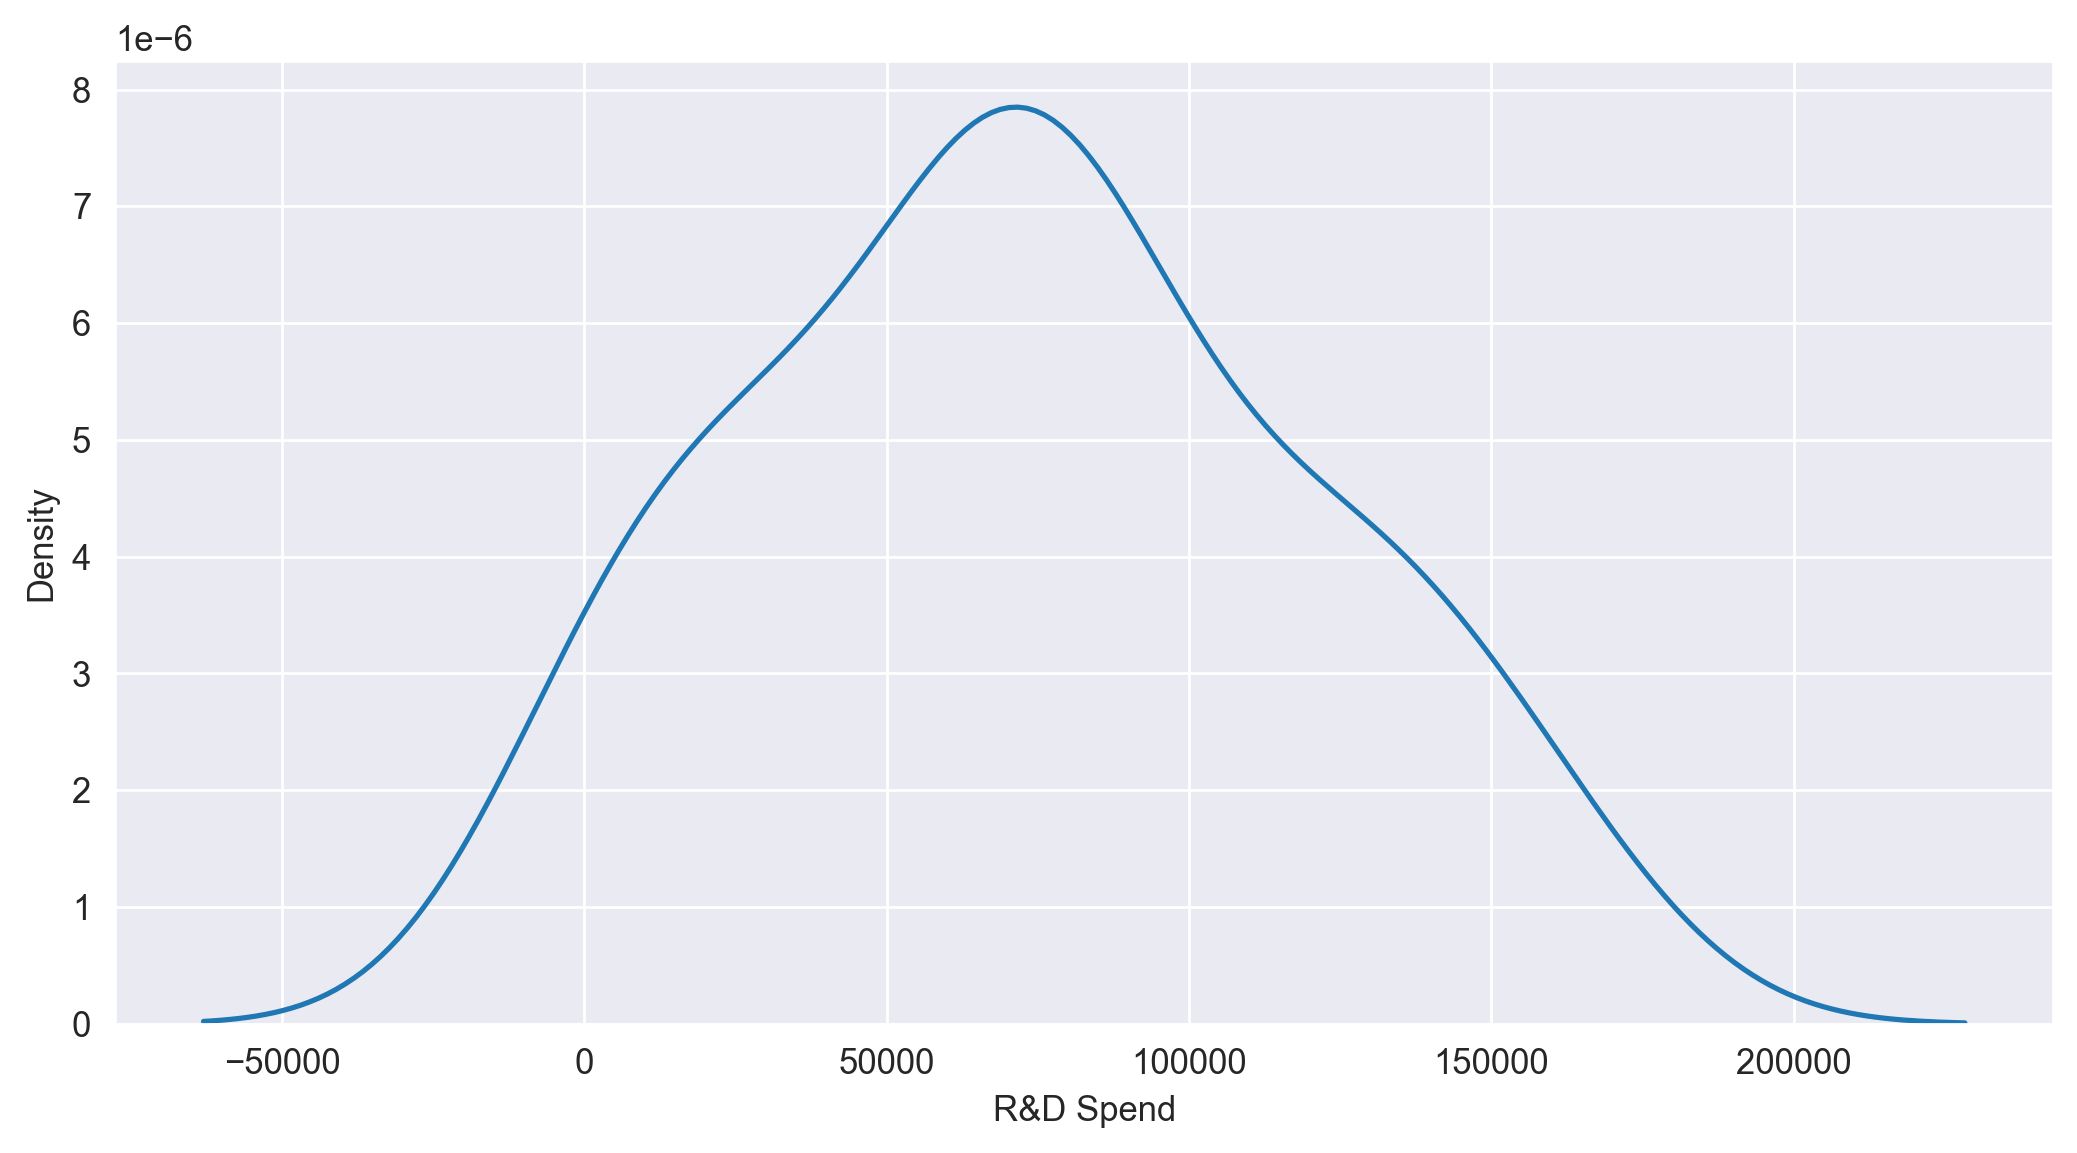

In [10]:
sns.distplot(df['R&D Spend'],hist=False)

<Axes: xlabel='Administration', ylabel='Density'>

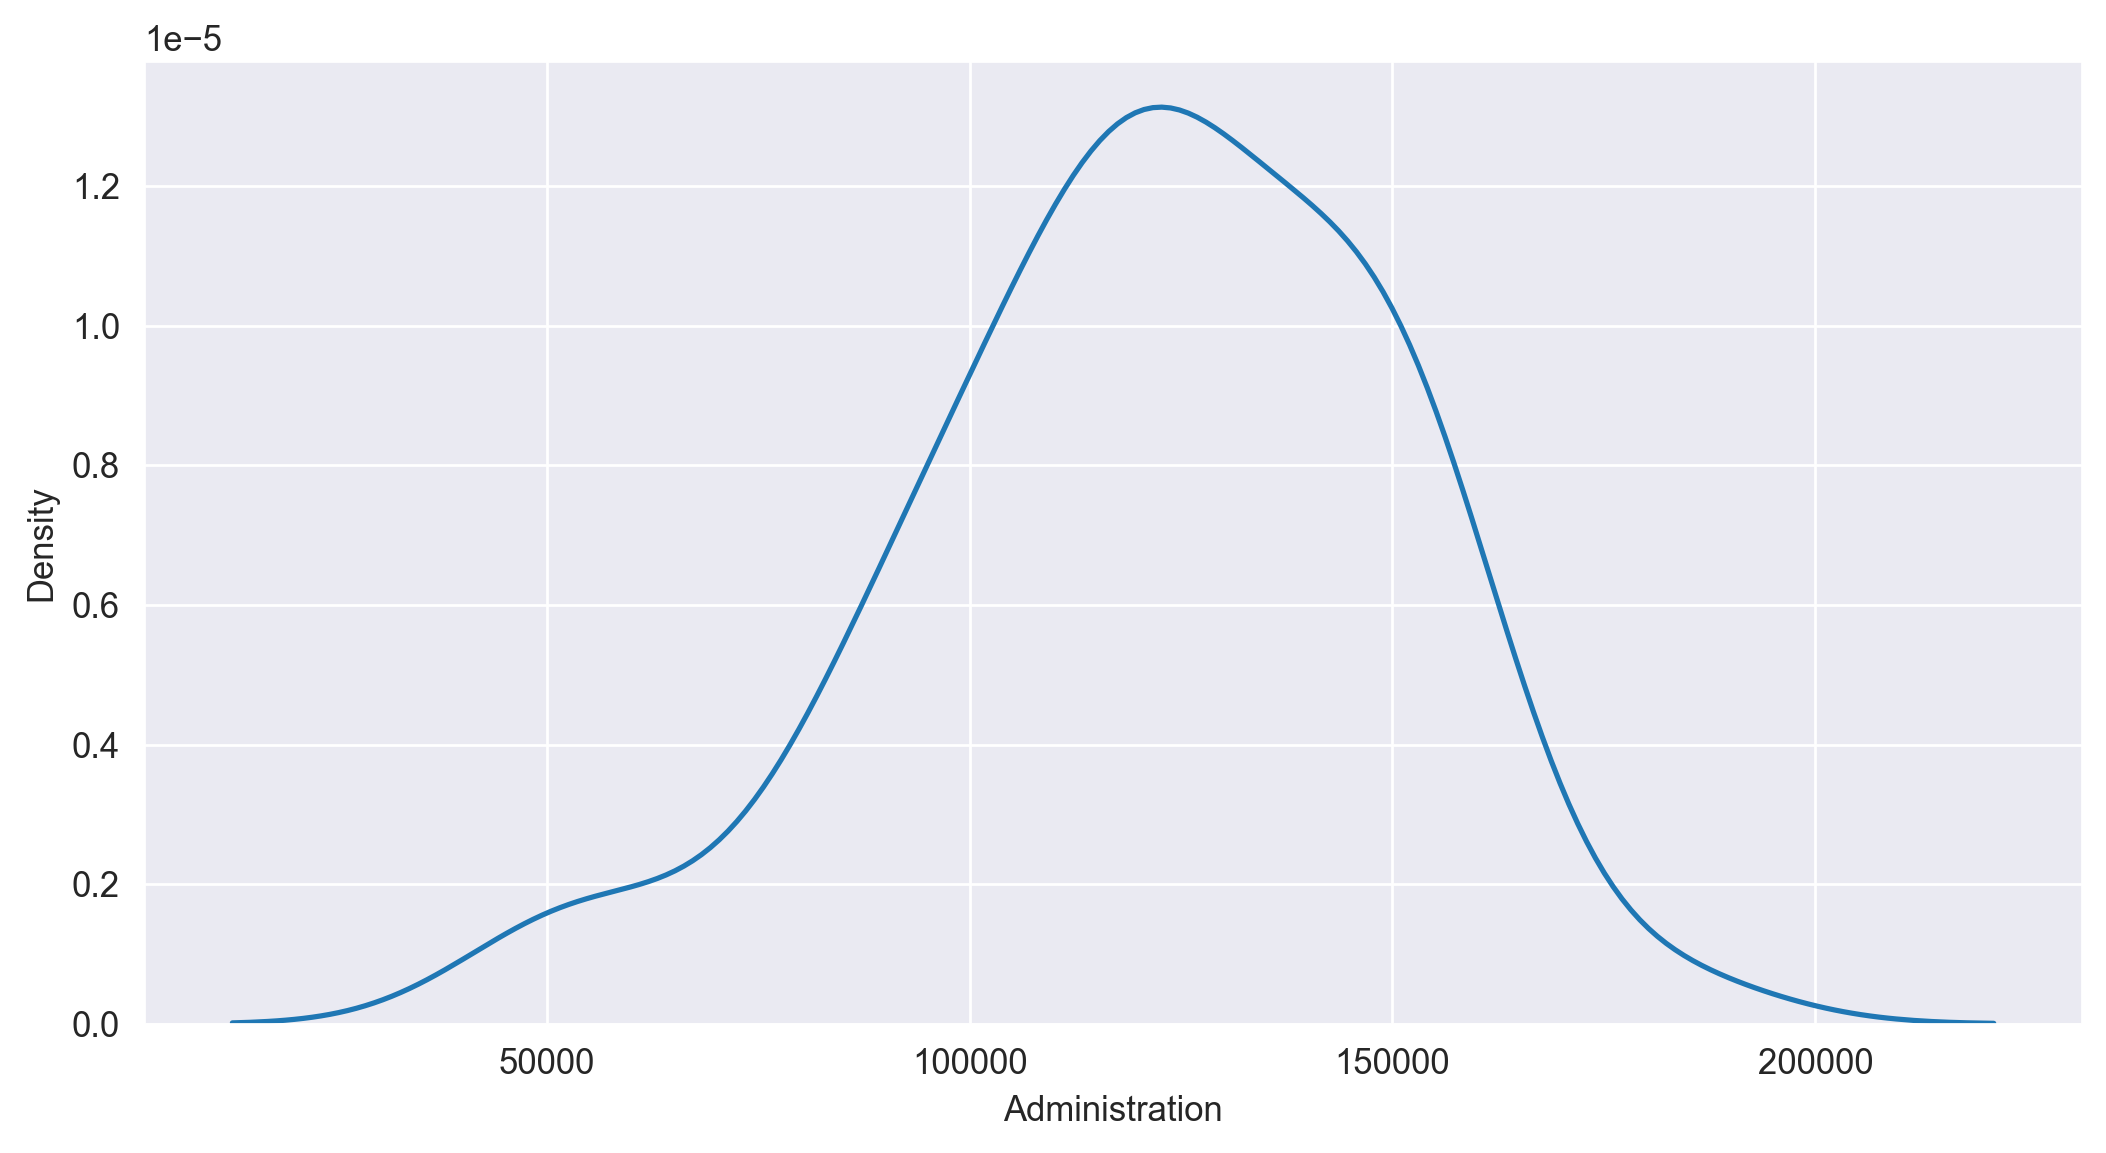

In [11]:
sns.distplot(df['Administration'], hist=False)

<Axes: xlabel='Marketing Spend', ylabel='Density'>

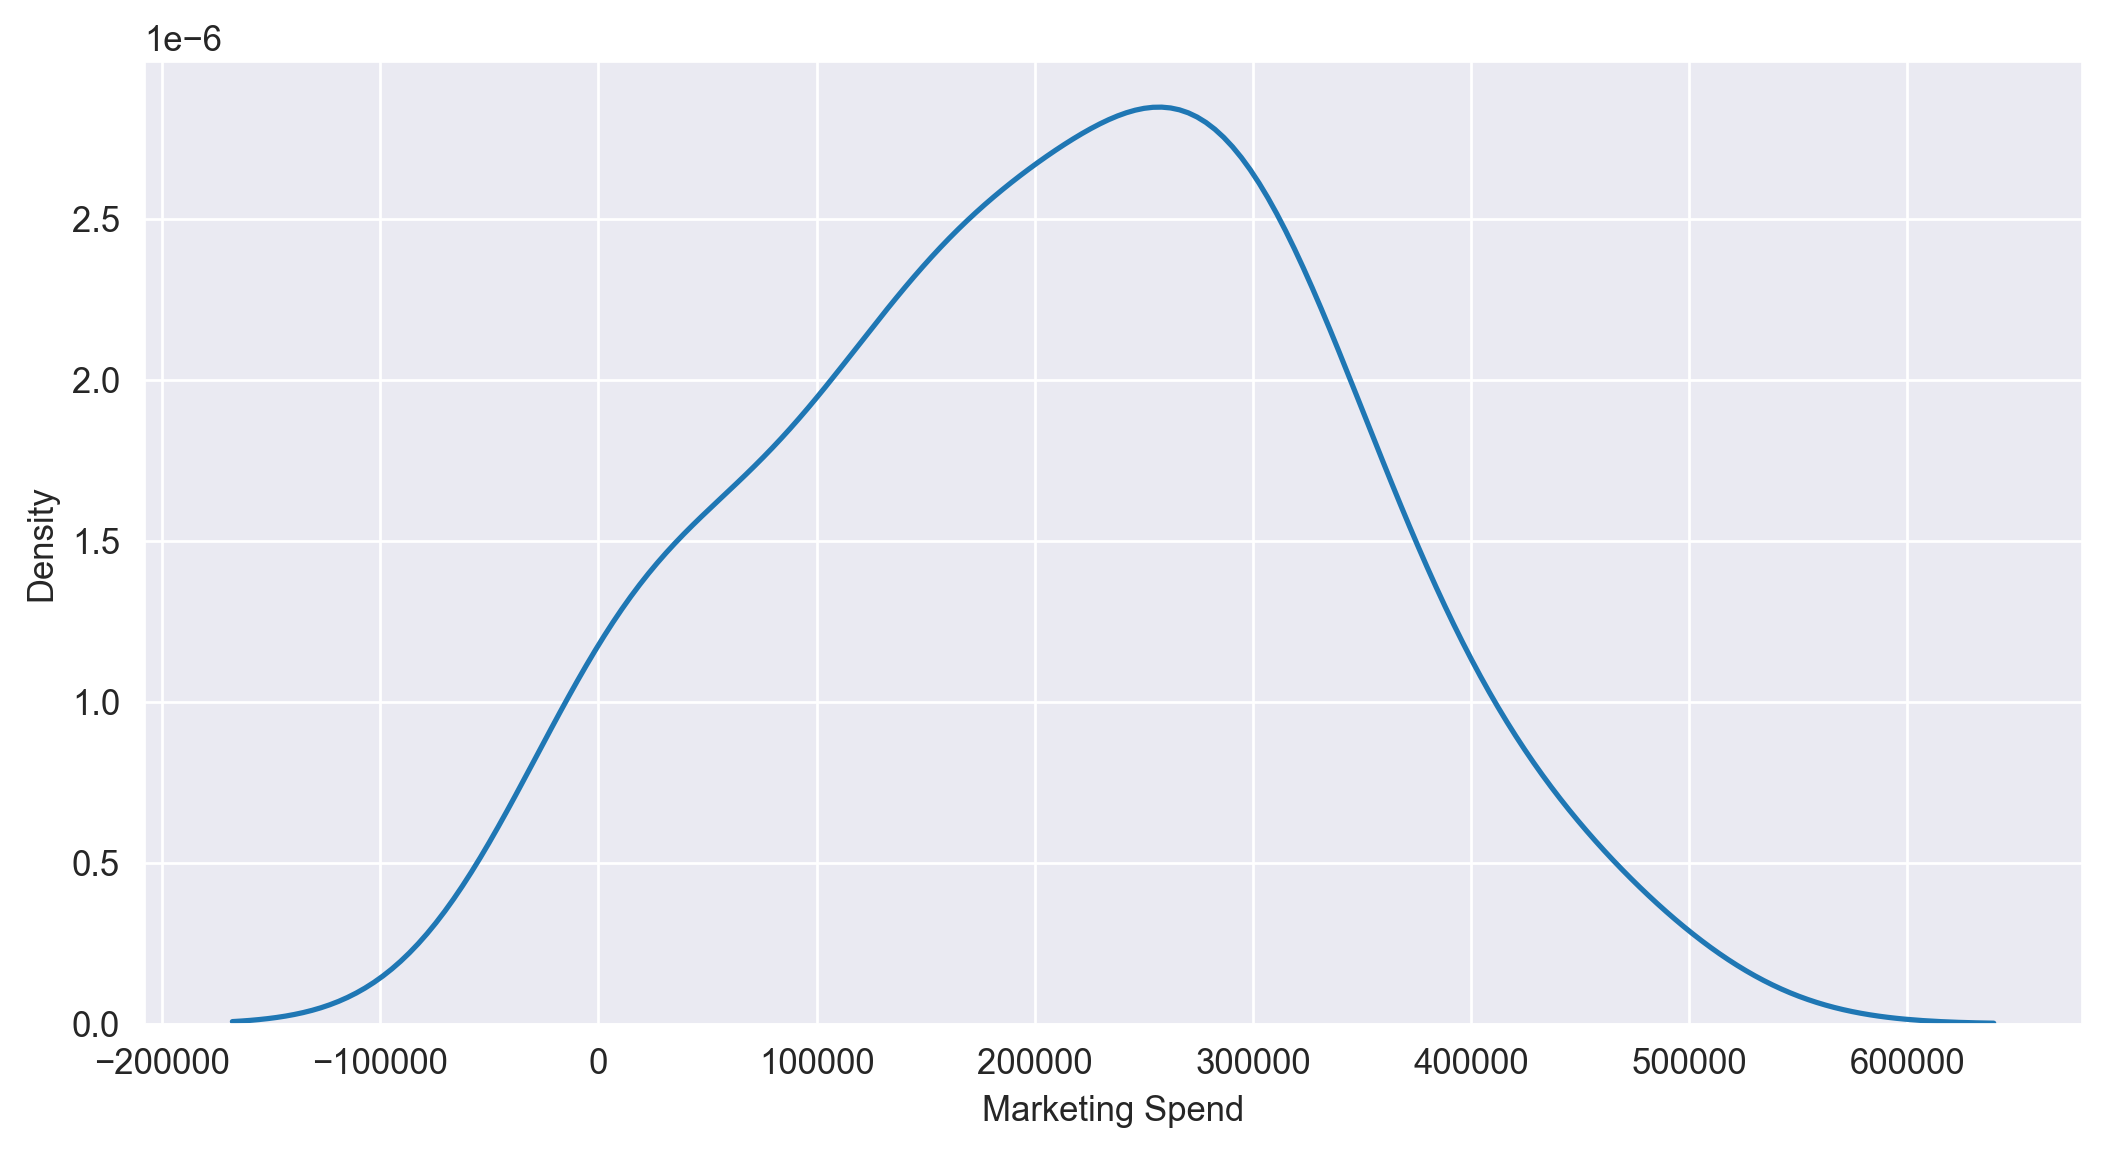

In [12]:
sns.distplot(df['Marketing Spend'], hist=False)

<Axes: xlabel='Profit', ylabel='Density'>

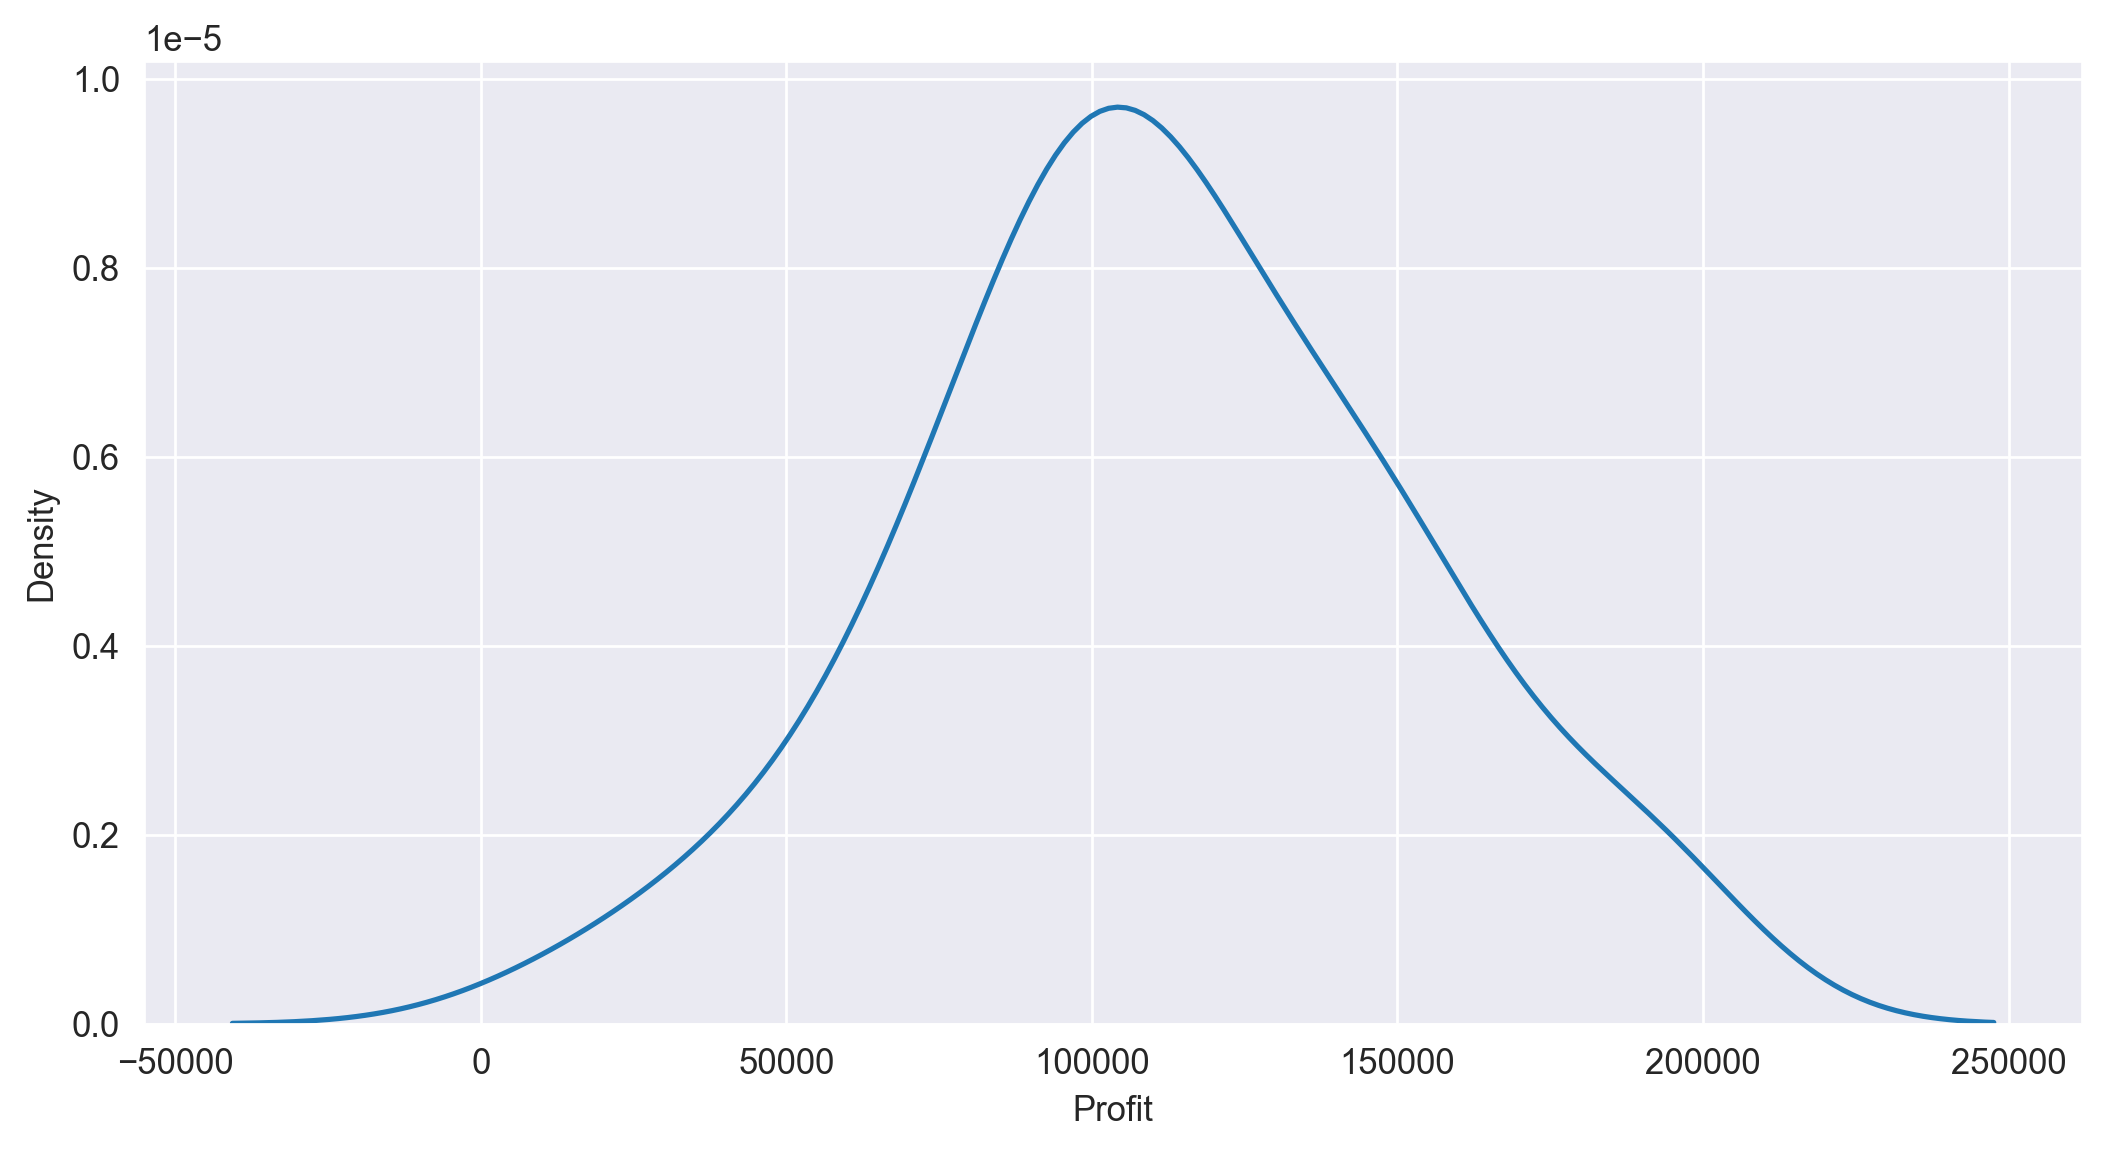

In [13]:
sns.distplot(df['Profit'], hist=False)

### Correalation Analysis

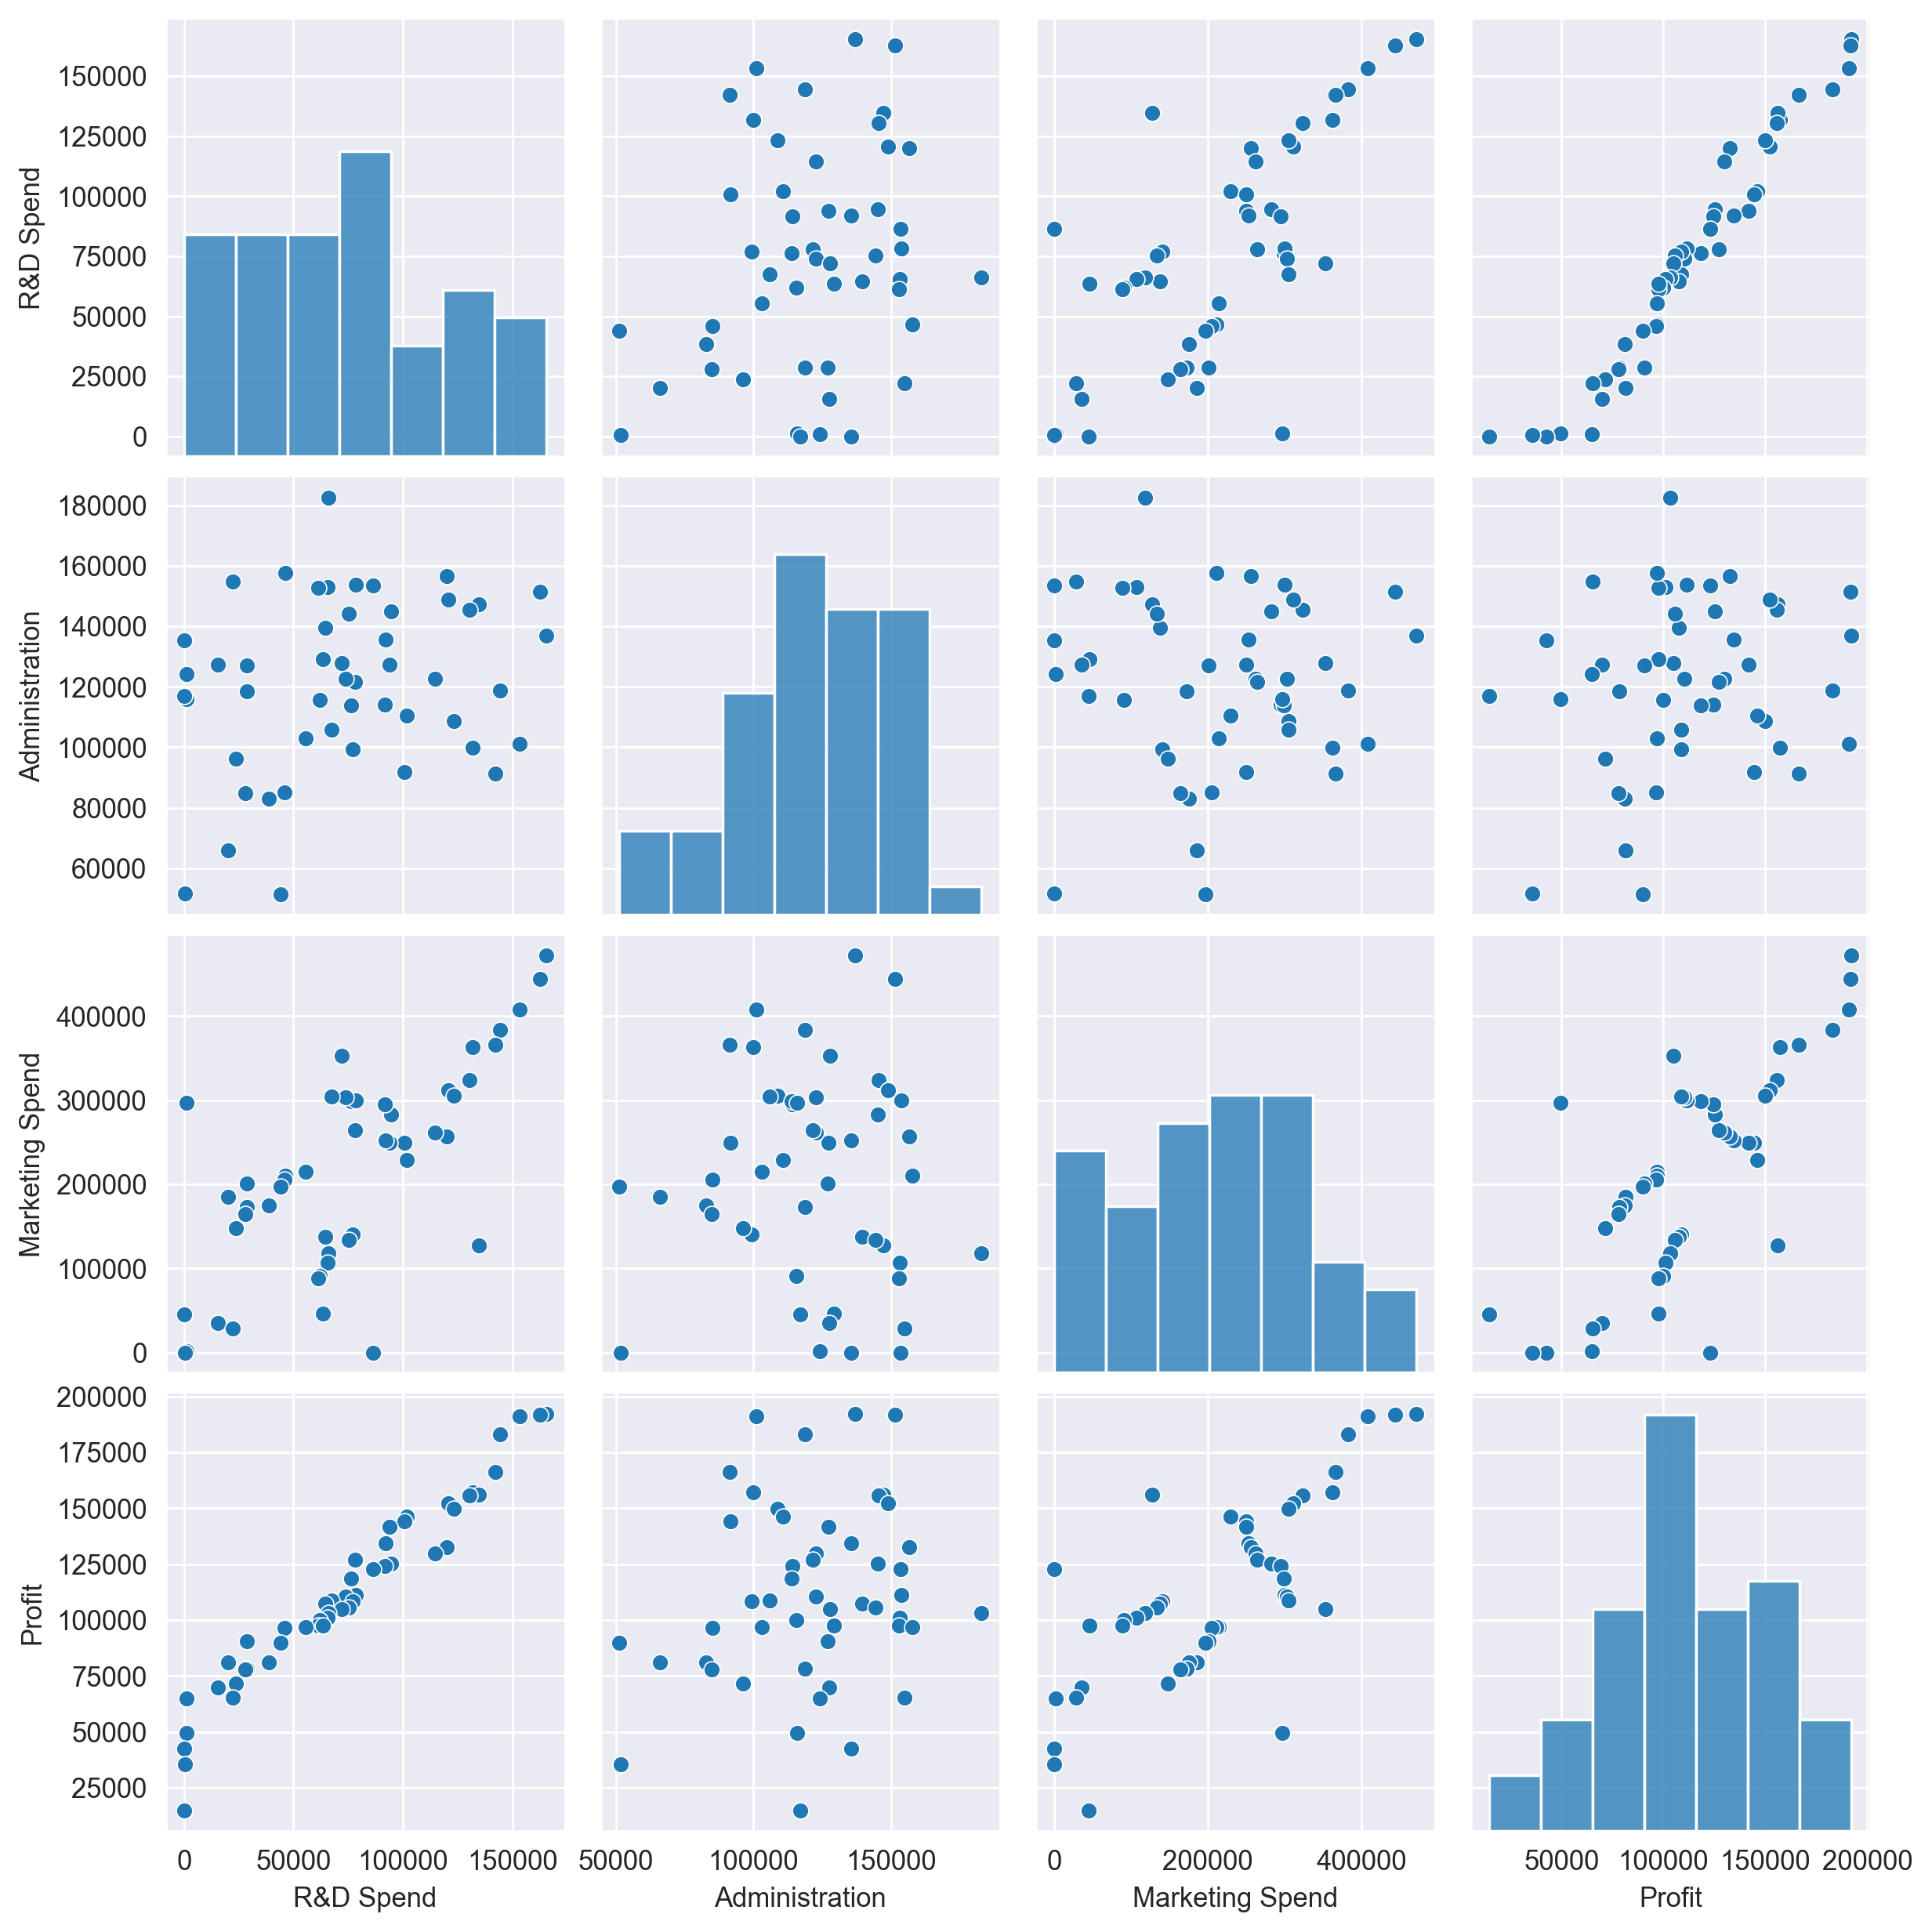

In [11]:
sns.pairplot(df)


In [12]:
df.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

<Axes: >

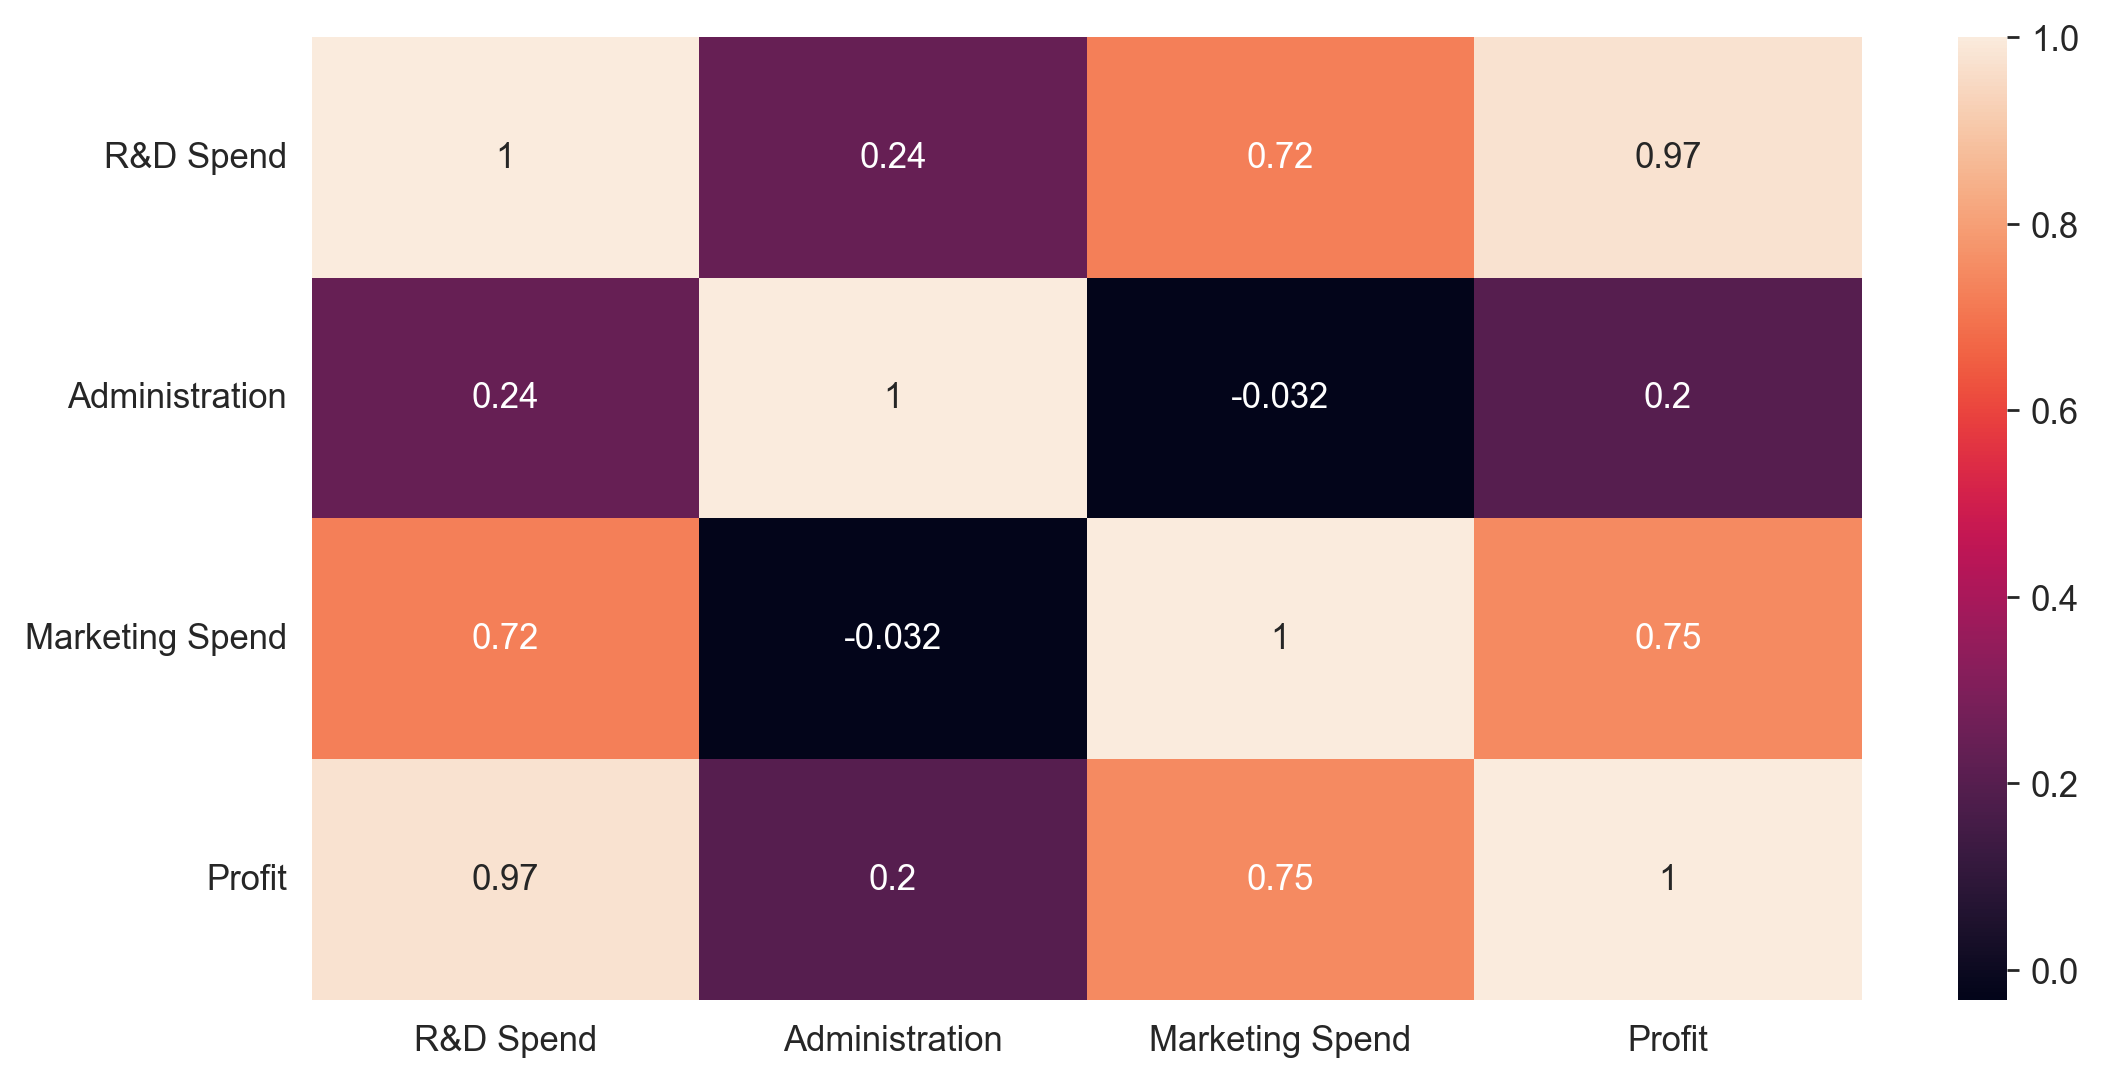

In [13]:
sns.heatmap(df.corr() , annot = True )

### Feature Engineering

In [14]:
df = pd.get_dummies(df,drop_first =True)

In [15]:
x = df.drop(['Profit'], axis = 1)
y = df['Profit']

In [16]:
x

R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0   165349.20       136897.80        471784.10              0               1
1   162597.70       151377.59        443898.53              0               0
2   153441.51       101145.55        407934.54              1               0
3   144372.41       118671.85        383199.62              0               1
4   142107.34        91391.77        366168.42              1               0
5   131876.90        99814.71        362861.36              0               1
6   134615.46       147198.87        127716.82              0               0
7   130298.13       145530.06        323876.68              1               0
8   120542.52       148718.95        311613.29              0               1
9   123334.88       108679.17        304981.62              0               0
10  101913.08       110594.11        229160.95              1               0
11  100671.96        91790.61        249744.55              0               0
12   93863.75       127320.38        249839.44              1               0
13   91992.39       135495.07        252664.93              0               0
14  119943.24       156547.42        256512.92              1               0
15  114523.61       122616.84        261776.23              0               1
16   78013.11       121597.55        264346.06              0               0
17   94657.16       145077.58        282574.31              0               1
18   91749.16       114175.79        294919.57              1               0
19   86419.70       153514.11             0.00              0               1
20   76253.86       113867.30        298664.47              0               0
21   78389.47       153773.43        299737.29              0               1
22   73994.56       122782.75        303319.26              1               0
23   67532.53       105751.03        304768.73              1               0
24   77044.01        99281.34        140574.81              0               1
25   64664.71       139553.16        137962.62              0               0
26   75328.87       144135.98        134050.07              1               0
27   72107.60       127864.55        353183.81              0               1
28   66051.52       182645.56        118148.20              1               0
29   65605.48       153032.06        107138.38              0               1
30   61994.48       115641.28         91131.24              1               0
31   61136.38       152701.92         88218.23              0               1
32   63408.86       129219.61         46085.25              0               0
33   55493.95       103057.49        214634.81              1               0
34   46426.07       157693.92        210797.67              0               0
35   46014.02        85047.44        205517.64              0               1
36   28663.76       127056.21        201126.82              1               0
37   44069.95        51283.14        197029.42              0               0
38   20229.59        65947.93        185265.10              0               1
39   38558.51        82982.09        174999.30              0               0
40   28754.33       118546.05        172795.67              0               0
41   27892.92        84710.77        164470.71              1               0
42   23640.93        96189.63        148001.11              0               0
43   15505.73       127382.30         35534.17              0               1
44   22177.74       154806.14         28334.72              0               0
45    1000.23       124153.04          1903.93              0               1
46    1315.46       115816.21        297114.46              1               0
47       0.00       135426.92             0.00              0               0
48     542.05        51743.15             0.00              0               1
49       0.00       116983.80         45173.06              0               0

In [17]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [18]:
scaler  = StandardScaler()
x = scaler.fit_transform(x)

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2 ,random_state = 1)

In [20]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

### Prediction

In [21]:
ypred = lr.predict(xtest)

In [22]:
ypred

array([114664.41715867,  90593.1553162 ,  75692.84151575,  70221.88679651,
       179790.25514873, 171576.92018521,  49753.5875203 , 102276.65888936,
        58649.37795761,  98272.02561131])

In [23]:
mean_squared_error(ytest,ypred)

79495441.50410984

In [24]:
np.sqrt(mean_squared_error(ytest,ypred))

8916.021618643028

In [25]:
R2_score =round(r2_score(ytest, ypred), 2)

In [26]:
R2_score

0.96

### Model using statsmodel library

In [45]:
df_renamed = df.rename(columns = {'R&D Spend': 'Spend_RND','Marketing Spend': 'Marketing_Spend','State_New York': 'State_New_York'})

In [46]:
df.renamed

Spend_RND  Administration  Marketing_Spend     Profit  State_Florida  \
0   165349.20       136897.80        471784.10  192261.83              0   
1   162597.70       151377.59        443898.53  191792.06              0   
2   153441.51       101145.55        407934.54  191050.39              1   
3   144372.41       118671.85        383199.62  182901.99              0   
4   142107.34        91391.77        366168.42  166187.94              1   
5   131876.90        99814.71        362861.36  156991.12              0   
6   134615.46       147198.87        127716.82  156122.51              0   
7   130298.13       145530.06        323876.68  155752.60              1   
8   120542.52       148718.95        311613.29  152211.77              0   
9   123334.88       108679.17        304981.62  149759.96              0   
10  101913.08       110594.11        229160.95  146121.95              1   
11  100671.96        91790.61        249744.55  144259.40              0   
12   93863.75       127320.38        249839.44  141585.52              1   
13   91992.39       135495.07        252664.93  134307.35              0   
14  119943.24       156547.42        256512.92  132602.65              1   
15  114523.61       122616.84        261776.23  129917.04              0   
16   78013.11       121597.55        264346.06  126992.93              0   
17   94657.16       145077.58        282574.31  125370.37              0   
18   91749.16       114175.79        294919.57  124266.90              1   
19   86419.70       153514.11             0.00  122776.86              0   
20   76253.86       113867.30        298664.47  118474.03              0   
21   78389.47       153773.43        299737.29  111313.02              0   
22   73994.56       122782.75        303319.26  110352.25              1   
23   67532.53       105751.03        304768.73  108733.99              1   
24   77044.01        99281.34        140574.81  108552.04              0   
25   64664.71       139553.16        137962.62  107404.34              0   
26   75328.87       144135.98        134050.07  105733.54              1   
27   72107.60       127864.55        353183.81  105008.31              0   
28   66051.52       182645.56        118148.20  103282.38              1   
29   65605.48       153032.06        107138.38  101004.64              0   
30   61994.48       115641.28         91131.24   99937.59              1   
31   61136.38       152701.92         88218.23   97483.56              0   
32   63408.86       129219.61         46085.25   97427.84              0   
33   55493.95       103057.49        214634.81   96778.92              1   
34   46426.07       157693.92        210797.67   96712.80              0   
35   46014.02        85047.44        205517.64   96479.51              0   
36   28663.76       127056.21        201126.82   90708.19              1   
37   44069.95        51283.14        197029.42   89949.14              0   
38   20229.59        65947.93        185265.10   81229.06              0   
39   38558.51        82982.09        174999.30   81005.76              0   
40   28754.33       118546.05        172795.67   78239.91              0   
41   27892.92        84710.77        164470.71   77798.83              1   
42   23640.93        96189.63        148001.11   71498.49              0   
43   15505.73       127382.30         35534.17   69758.98              0   
44   22177.74       154806.14         28334.72   65200.33              0   
45    1000.23       124153.04          1903.93   64926.08              0   
46    1315.46       115816.21        297114.46   49490.75              1   
47       0.00       135426.92             0.00   42559.73              0   
48     542.05        51743.15             0.00   35673.41              0   
49       0.00       116983.80         45173.06   14681.40              0   

    State_New_York  
0                1  
1                0  
2                0  
3                1  
4                0  
5

In [47]:
import statsmodels.formula.api as smf
model = smf.ols('Profit ~ Spend_RND + Administration + Marketing_Spend + State_Florida + State_New_York' , data=df.renamed).fit()
model.params

Intercept          50125.343832
Spend_RND              0.806023
Administration        -0.027004
Marketing_Spend        0.026980
State_Florida        198.788793
State_New_York       -41.887019
dtype: float64

In [48]:
model.pvalues

Intercept          4.444178e-09
Spend_RND          2.578772e-21
Administration     6.077373e-01
Marketing_Spend    1.226769e-01
State_Florida      9.532429e-01
State_New_York     9.897941e-01
dtype: float64

In [49]:
model.rsquared , model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

### Calculate VIF

as this model built for predection not for feature selrction there is no need to remove columns due to multicollinearity


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_renamed.head()

Spend_RND  Administration  Marketing_Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83              0   
1  162597.70       151377.59        443898.53  191792.06              0   
2  153441.51       101145.55        407934.54  191050.39              1   
3  144372.41       118671.85        383199.62  182901.99              0   
4  142107.34        91391.77        366168.42  166187.94              1   

   State_New_York  
0               1  
1               0  
2               0  
3               1  
4               0

In [52]:
data = df_renamed.drop(columns=['Profit'])
data

Spend_RND  Administration  Marketing_Spend  State_Florida  State_New_York
0   165349.20       136897.80        471784.10              0               1
1   162597.70       151377.59        443898.53              0               0
2   153441.51       101145.55        407934.54              1               0
3   144372.41       118671.85        383199.62              0               1
4   142107.34        91391.77        366168.42              1               0
5   131876.90        99814.71        362861.36              0               1
6   134615.46       147198.87        127716.82              0               0
7   130298.13       145530.06        323876.68              1               0
8   120542.52       148718.95        311613.29              0               1
9   123334.88       108679.17        304981.62              0               0
10  101913.08       110594.11        229160.95              1               0
11  100671.96        91790.61        249744.55              0               0
12   93863.75       127320.38        249839.44              1               0
13   91992.39       135495.07        252664.93              0               0
14  119943.24       156547.42        256512.92              1               0
15  114523.61       122616.84        261776.23              0               1
16   78013.11       121597.55        264346.06              0               0
17   94657.16       145077.58        282574.31              0               1
18   91749.16       114175.79        294919.57              1               0
19   86419.70       153514.11             0.00              0               1
20   76253.86       113867.30        298664.47              0               0
21   78389.47       153773.43        299737.29              0               1
22   73994.56       122782.75        303319.26              1               0
23   67532.53       105751.03        304768.73              1               0
24   77044.01        99281.34        140574.81              0               1
25   64664.71       139553.16        137962.62              0               0
26   75328.87       144135.98        134050.07              1               0
27   72107.60       127864.55        353183.81              0               1
28   66051.52       182645.56        118148.20              1               0
29   65605.48       153032.06        107138.38              0               1
30   61994.48       115641.28         91131.24              1               0
31   61136.38       152701.92         88218.23              0               1
32   63408.86       129219.61         46085.25              0               0
33   55493.95       103057.49        214634.81              1               0
34   46426.07       157693.92        210797.67              0               0
35   46014.02        85047.44        205517.64              0               1
36   28663.76       127056.21        201126.82              1               0
37   44069.95        51283.14        197029.42              0               0
38   20229.59        65947.93        185265.10              0               1
39   38558.51        82982.09        174999.30              0               0
40   28754.33       118546.05        172795.67              0               0
41   27892.92        84710.77        164470.71              1               0
42   23640.93        96189.63        148001.11              0               0
43   15505.73       127382.30         35534.17              0               1
44   22177.74       154806.14         28334.72              0               0
45    1000.23       124153.04          1903.93              0               1
46    1315.46       115816.21        297114.46              1               0
47       0.00       135426.92             0.00              0               0
48     542.05        51743.15             0.00              0               1
49       0.00       116983.80         45173.06              0               0

In [53]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [54]:
vif['Features'] = data.columns
vif

Features
0        Spend_RND
1   Administration
2  Marketing_Spend
3    State_Florida
4   State_New_York

In [60]:
data.values

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.0000000e+00,
        0.00

In [61]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

Features       VIF
0        Spend_RND  8.451019
1   Administration  4.950277
2  Marketing_Spend  8.092278
3    State_Florida  2.004519
4   State_New_York  1.928836

### Subset selection
Aic and R2 calculation

In [62]:
#R&D Spend
RND_Spend = smf.ols('Profit ~ Spend_RND + Administration + State_Florida + State_New_York',data = df_renamed).fit()
RND_Spend.rsquared, RND_Spend.aic

(0.9479799298023537, 1063.503443921346)

In [64]:
#Marketing_Spend
MSpend = smf.ols('Profit ~ Administration + Marketing_Spend + State_Florida + State_New_York',data = df_renamed).fit()
MSpend.rsquared,MSpend.aic

(0.6131075019799208, 1163.8293070259358)

### Model building after Multicollinearity removal
As per the subset selection, it is clear that R&d spend column is more important than Marketing spend column as it's R2 value is more and AIC value is less,So we will select R&D spend columns and will drop Marketing spend column.

In [65]:
model = smf.ols('Profit ~ Spend_RND + Administration + State_Florida + State_New_York', data=df_renamed).fit()
model.rsquared

0.9479799298023537

### Model Validation 
#### Residual Analysis

In [39]:
model.resid

0      -128.741364
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193818
5     -6482.687120
6     -1976.782788
7     -4403.044650
8       577.026673
9     -5069.702528
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761169
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396604
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163825
41     2842.518952
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502003
48   -13449.663082
49   -33503.638791
dtype: float64

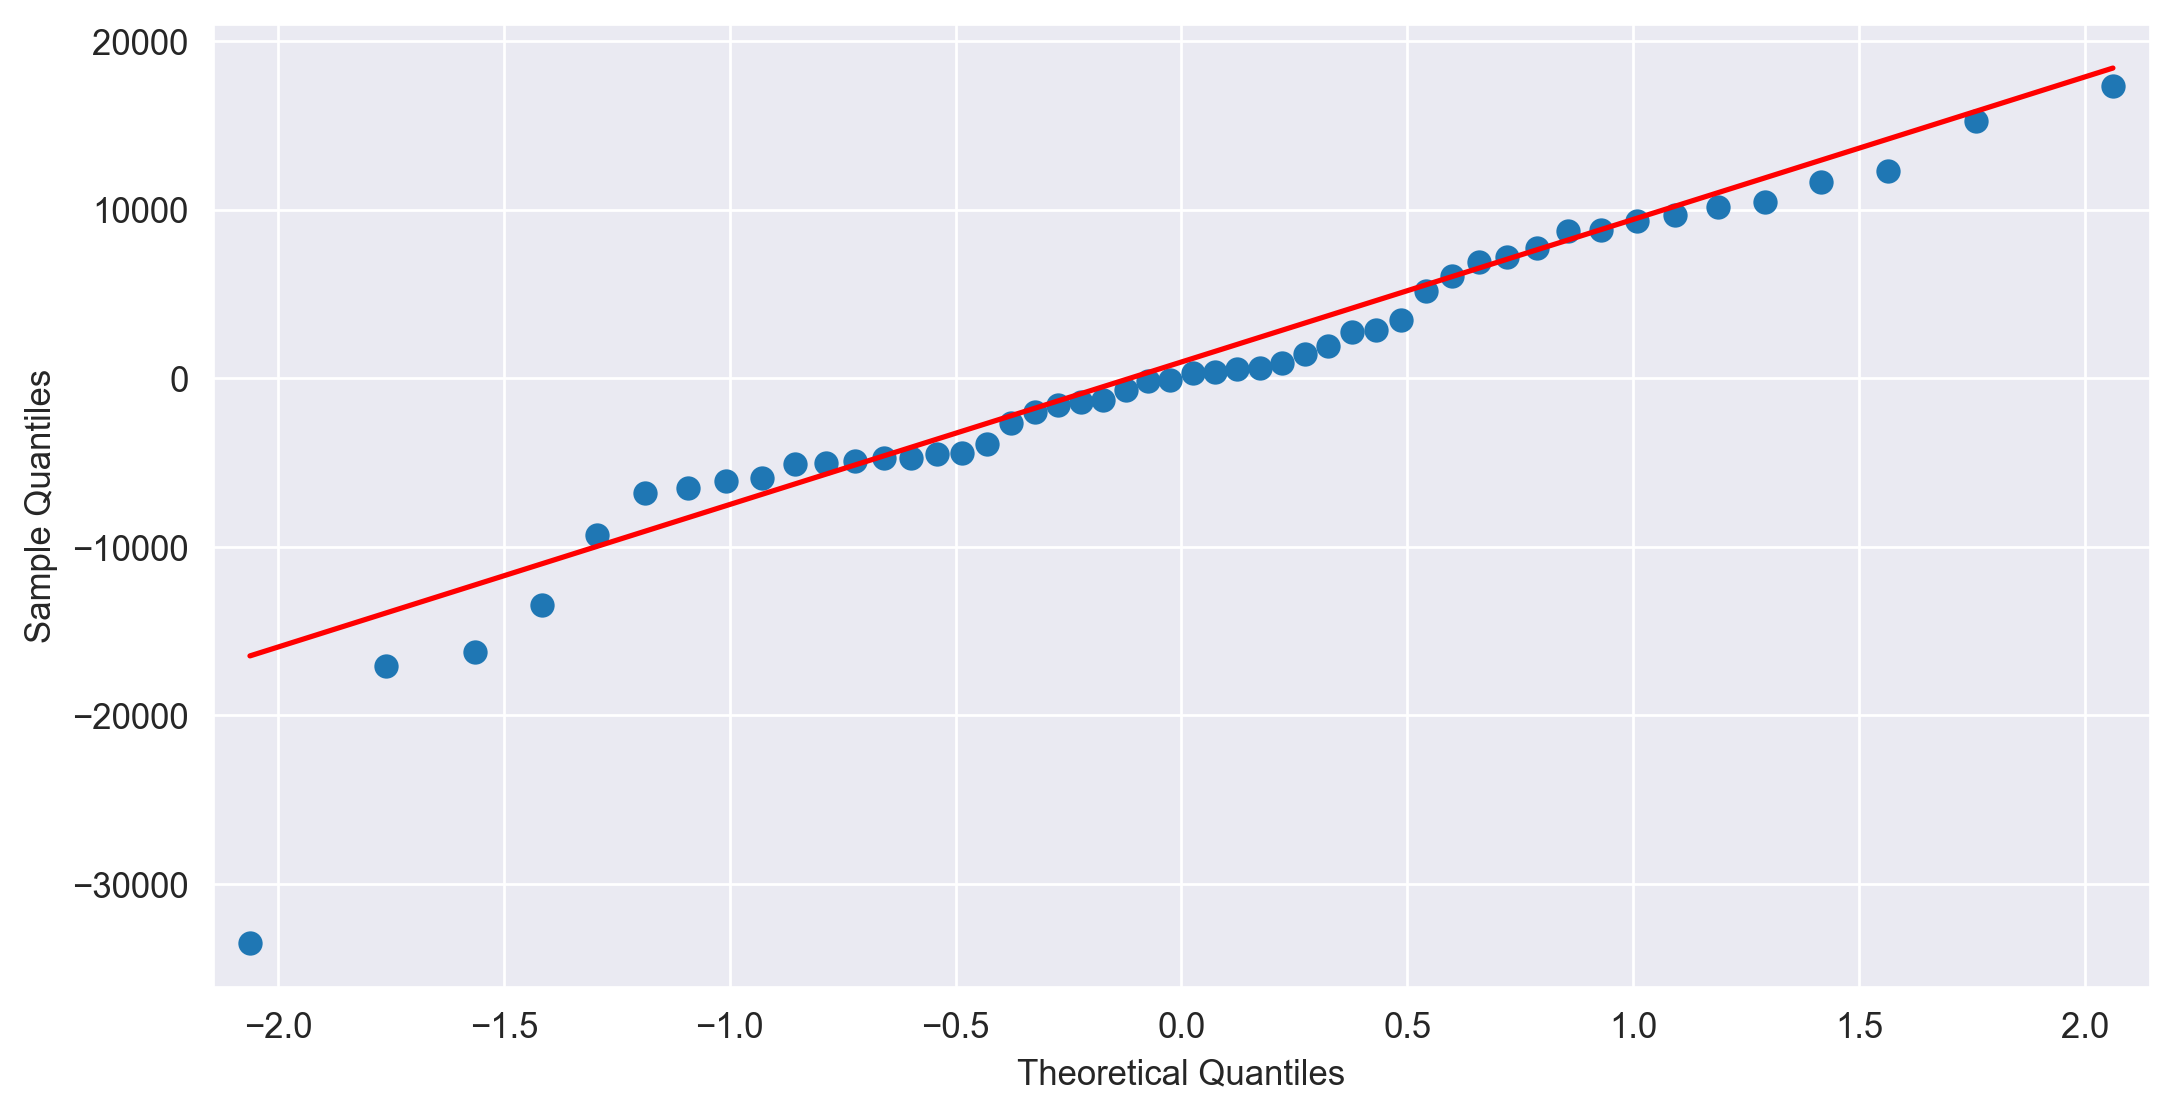

In [41]:
import statsmodels.api as sm
sm.qqplot(model.resid ,line='q');

In [42]:
np.argmax(model.resid), np.max(model.resid)

(45, 17337.71529129581)

## R2 Score dataframe

In [72]:
dict1 = {"R2_Score_linear_regression_model" : [0.96] , "R2_Score_StatsModel_model": [0.95],
         "R2_Score_after_subset_selection_model" :[0.94] }
R2_Score_df = pd.DataFrame(dict1)
R2_Score_df

R2_Score_linear_regression_model  R2_Score_StatsModel_model  \
0                              0.96                       0.95   

   R2_Score_after_subset_selection_model  
0                                   0.94

## Toyota Corolla dataset

In [43]:
toyota = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\ToyotaCorolla.csv",encoding  = "latin-1")

In [44]:
toyota.shape

(1436, 38)

In [45]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [46]:
corolla = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [47]:
corolla.shape

(1436, 9)

In [48]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [49]:
corolla.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

### Descriptive Statistics
here the outliers are present is columns


In [50]:
corolla.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

{'whiskers': [<matplotlib.lines.Line2D at 0x1876c7fb820>,
 'caps': [<matplotlib.lines.Line2D at 0x1876c7fbd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1876c7fb580>,
 'medians': [<matplotlib.lines.Line2D at 0x1876c8302e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1876c830580>,
 'means': []}

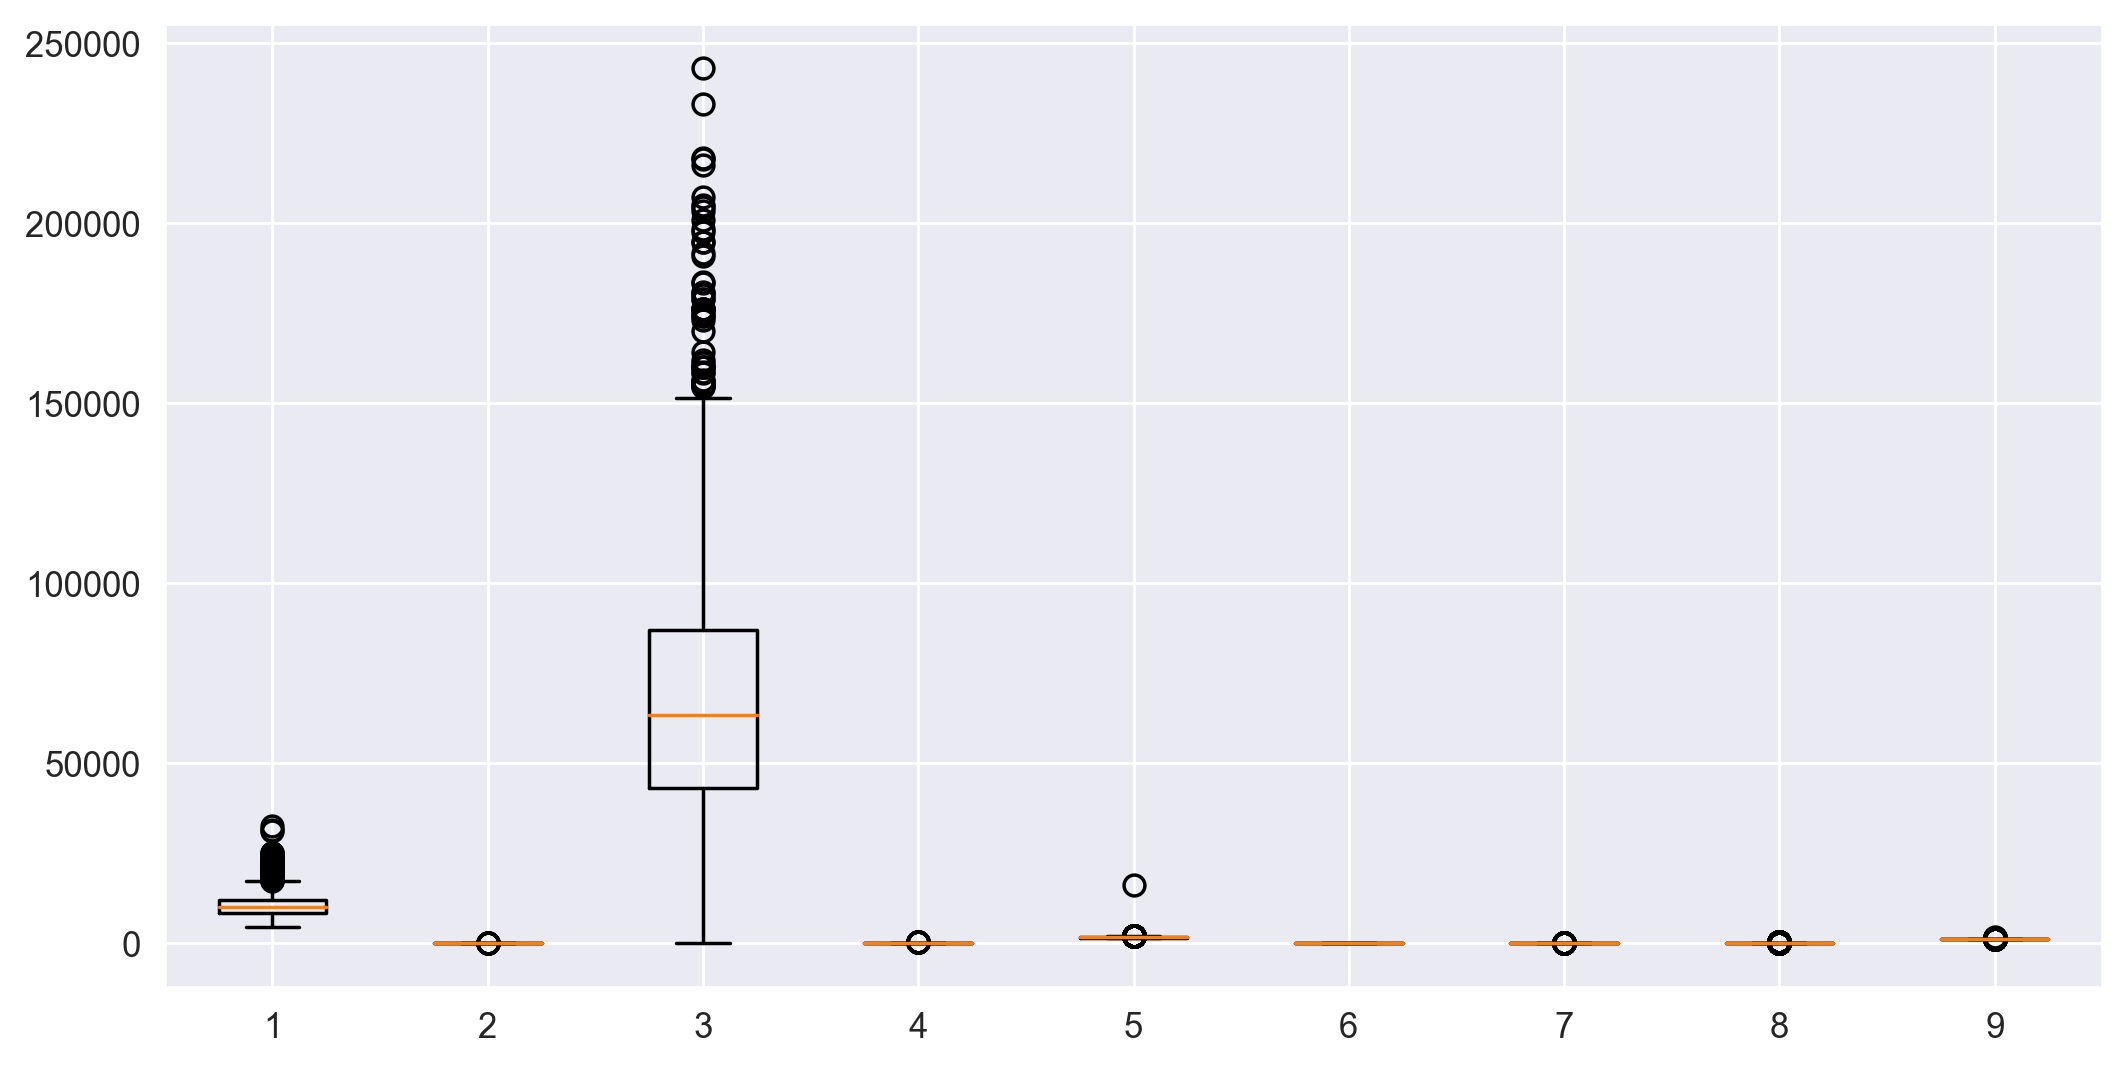

In [51]:
plt.boxplot(corolla)

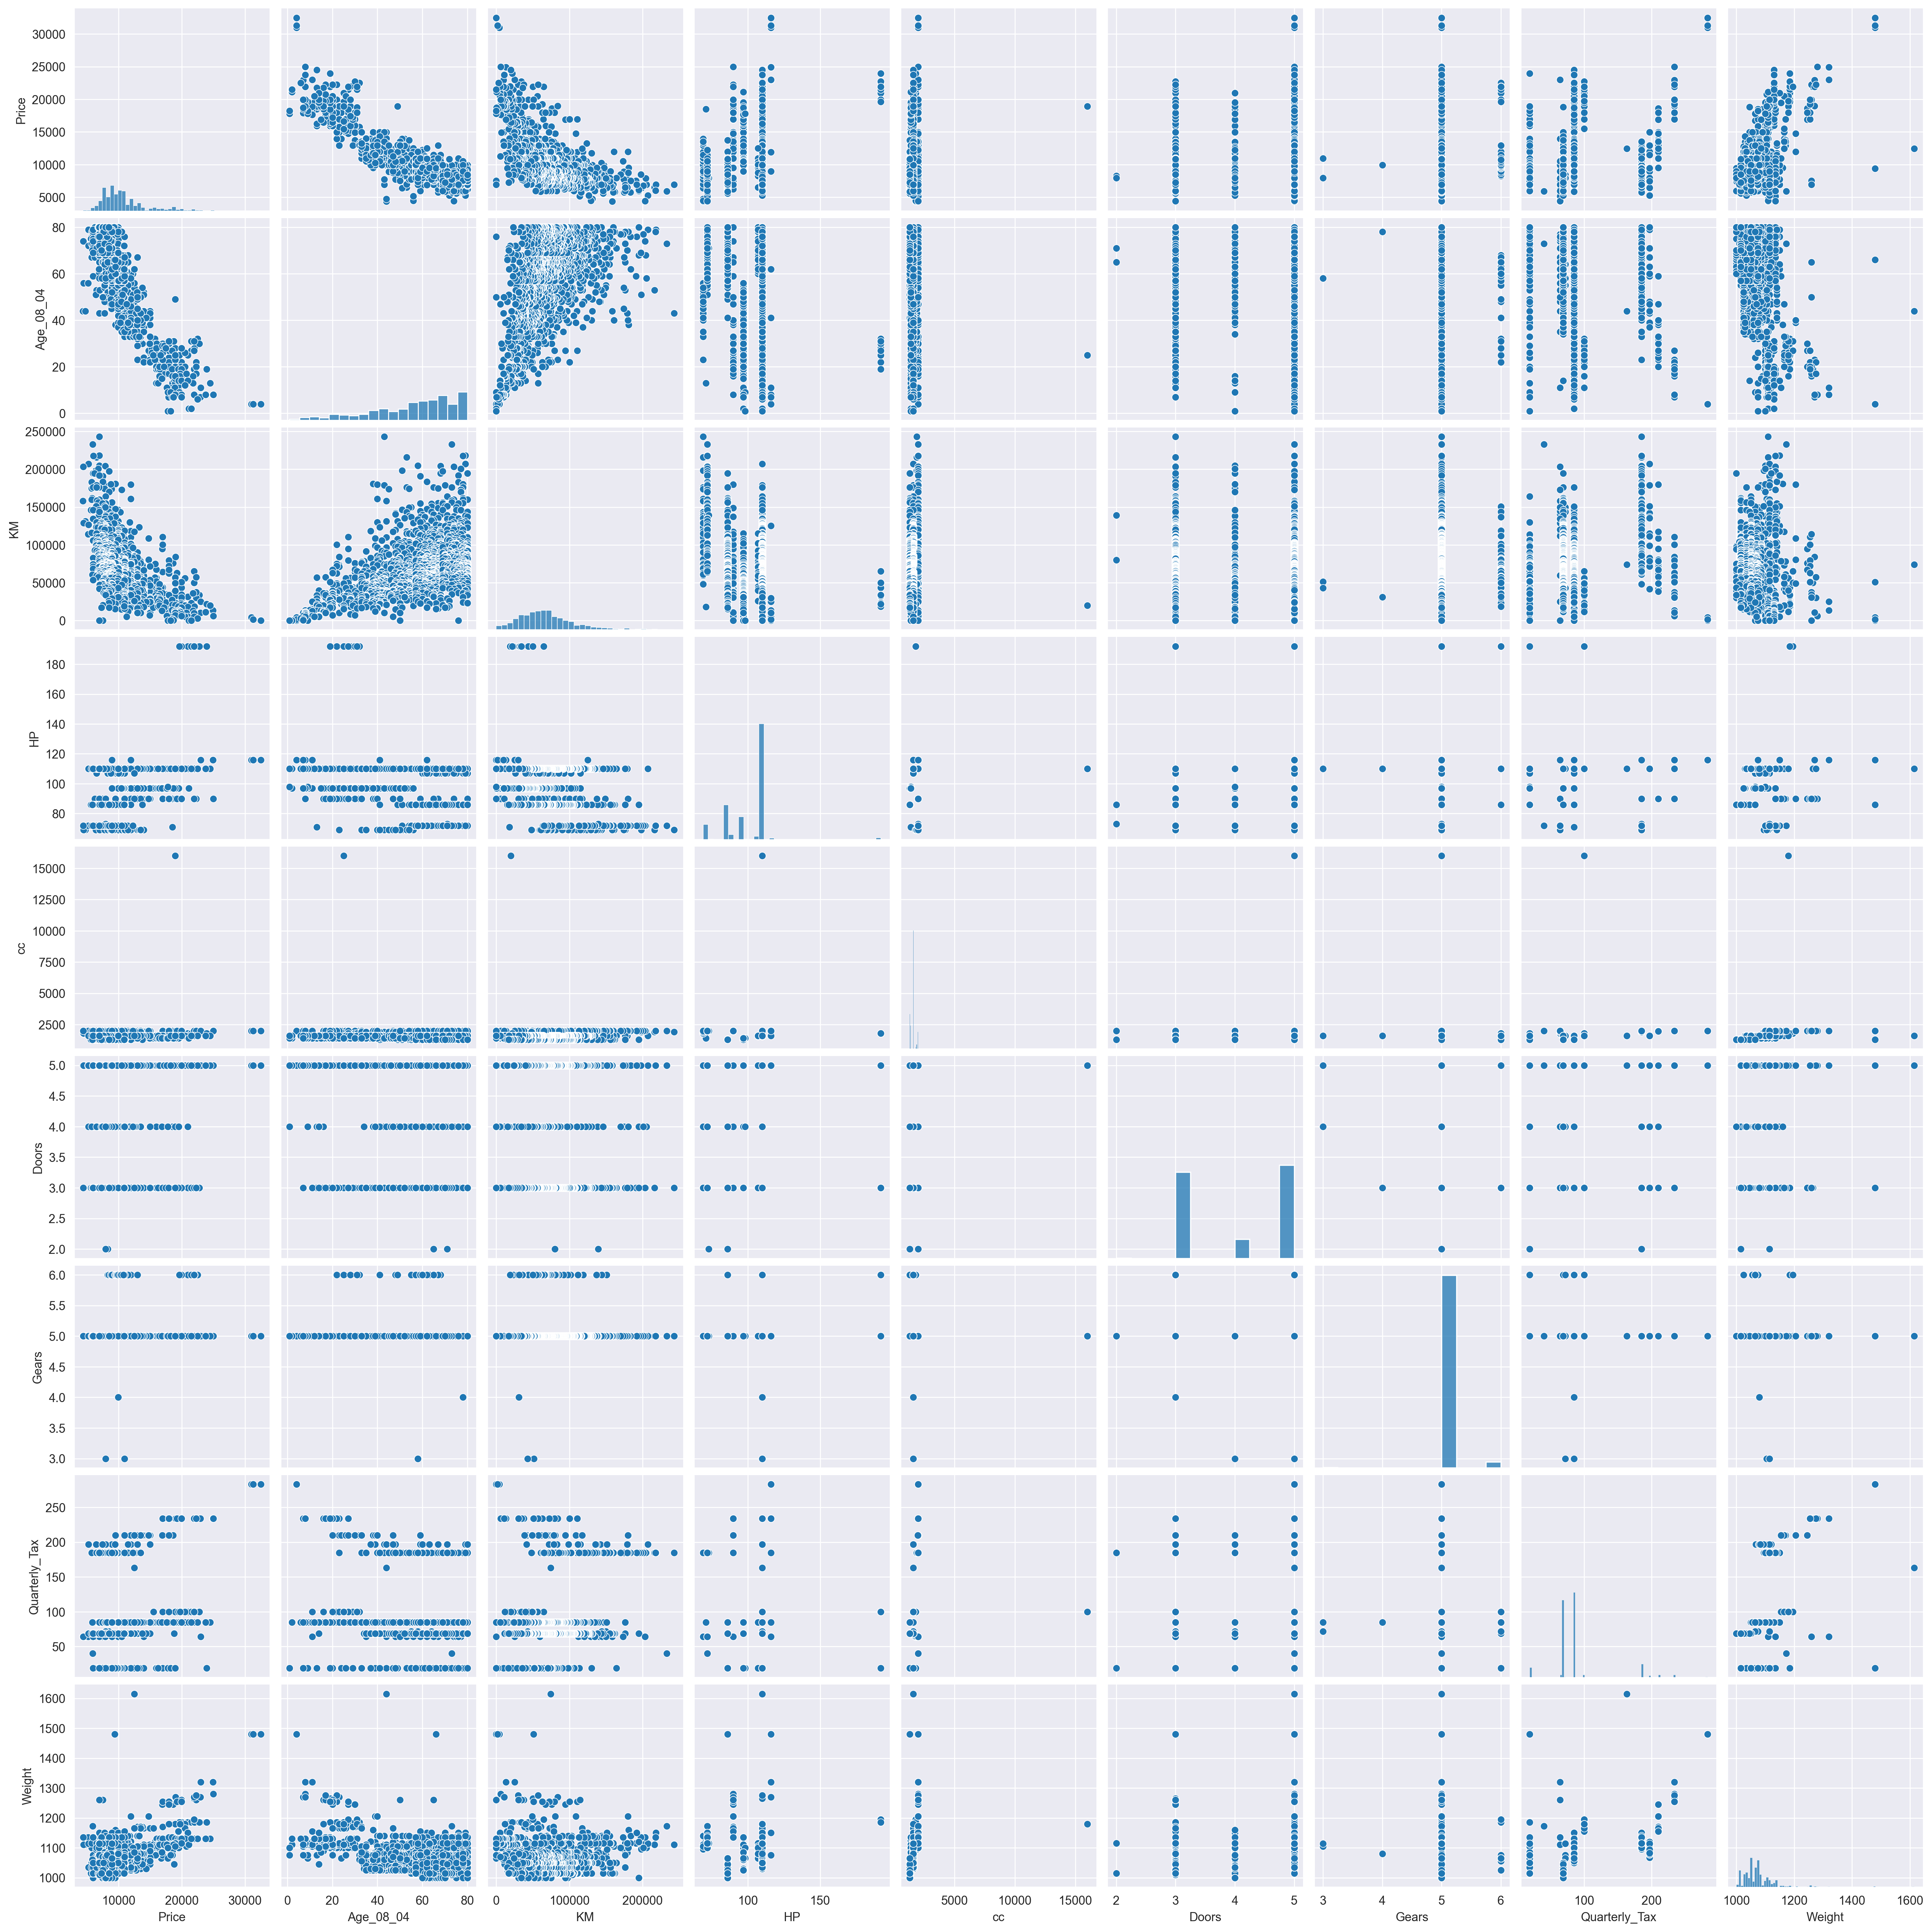

In [52]:
sns.pairplot(corolla)

<Axes: >

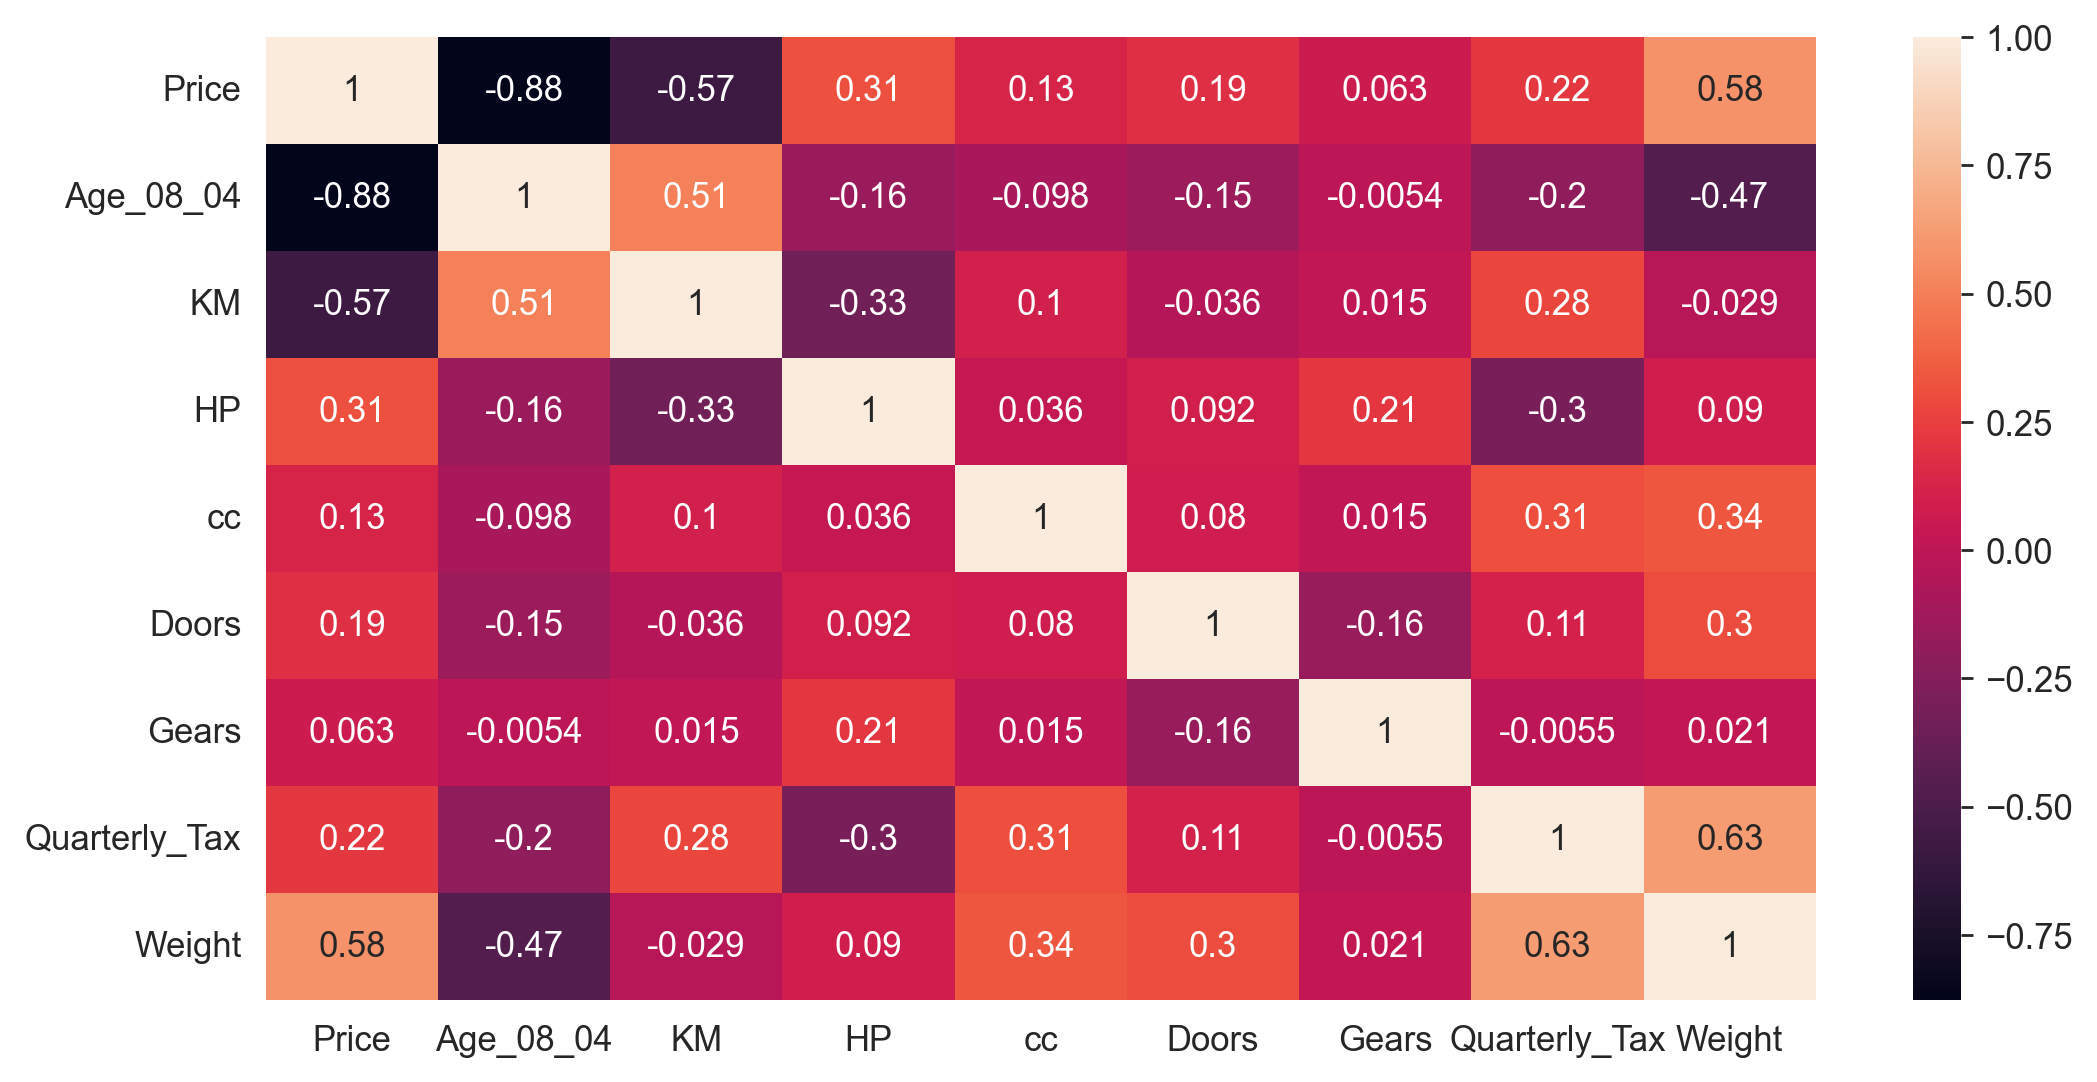

In [53]:
sns.heatmap(corolla.corr(), annot = True)

### Outlier Removal

In [54]:
pe.box(corolla['Price'])

In [55]:
corolla[corolla['Price'] > 17200]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
7    18600         30  75889   90  2000      3      5            210    1245
8    21500         27  19700  192  1800      3      5            100    1185
10   20950         25  31461  192  1800      3      6            100    1185
11   19950         22  43610  192  1800      3      6            100    1185
12   19600         25  32189  192  1800      3      6            100    1185
..     ...        ...    ...  ...   ...    ...    ...            ...     ...
182  21125          2    225   97  1400      5      5             85    1110
183  21500          2     15  110  1600      5      5             85    1130
184  17795          1      1   98  1400      4      5             19    1100
185  18245          1      1  110  1600      5      5             19    1075
523  18950         49  49568  110  1600      3      5             19    1105

[110 rows x 9 columns]

In [56]:
def outlier_cap(df,column):
    for index, row in df.iterrows():
        h = df[column].quantile(0.75)
        l = df[column].quantile(0.25)
        IQR = h - l
        upper_threshold = h + 1.5*IQR
        lower_threshold = l - 1.5*IQR
        if row[column] > upper_threshold:
            df.at[index, column] = upper_threshold
        elif row[column] < lower_threshold:
            df.at[index, column] = lower_threshold

In [57]:
for i in corolla:
    outlier_cap(corolla,i)

In [58]:
corolla[corolla['Price'] > 17200]

Empty DataFrame
Columns: [Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight]
Index: []

{'whiskers': [<matplotlib.lines.Line2D at 0x18707f1cdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x18707f1d1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18707f1cb20>,
 'medians': [<matplotlib.lines.Line2D at 0x18707f1d720>,
 'fliers': [<matplotlib.lines.Line2D at 0x18707f1d9c0>,
 'means': []}

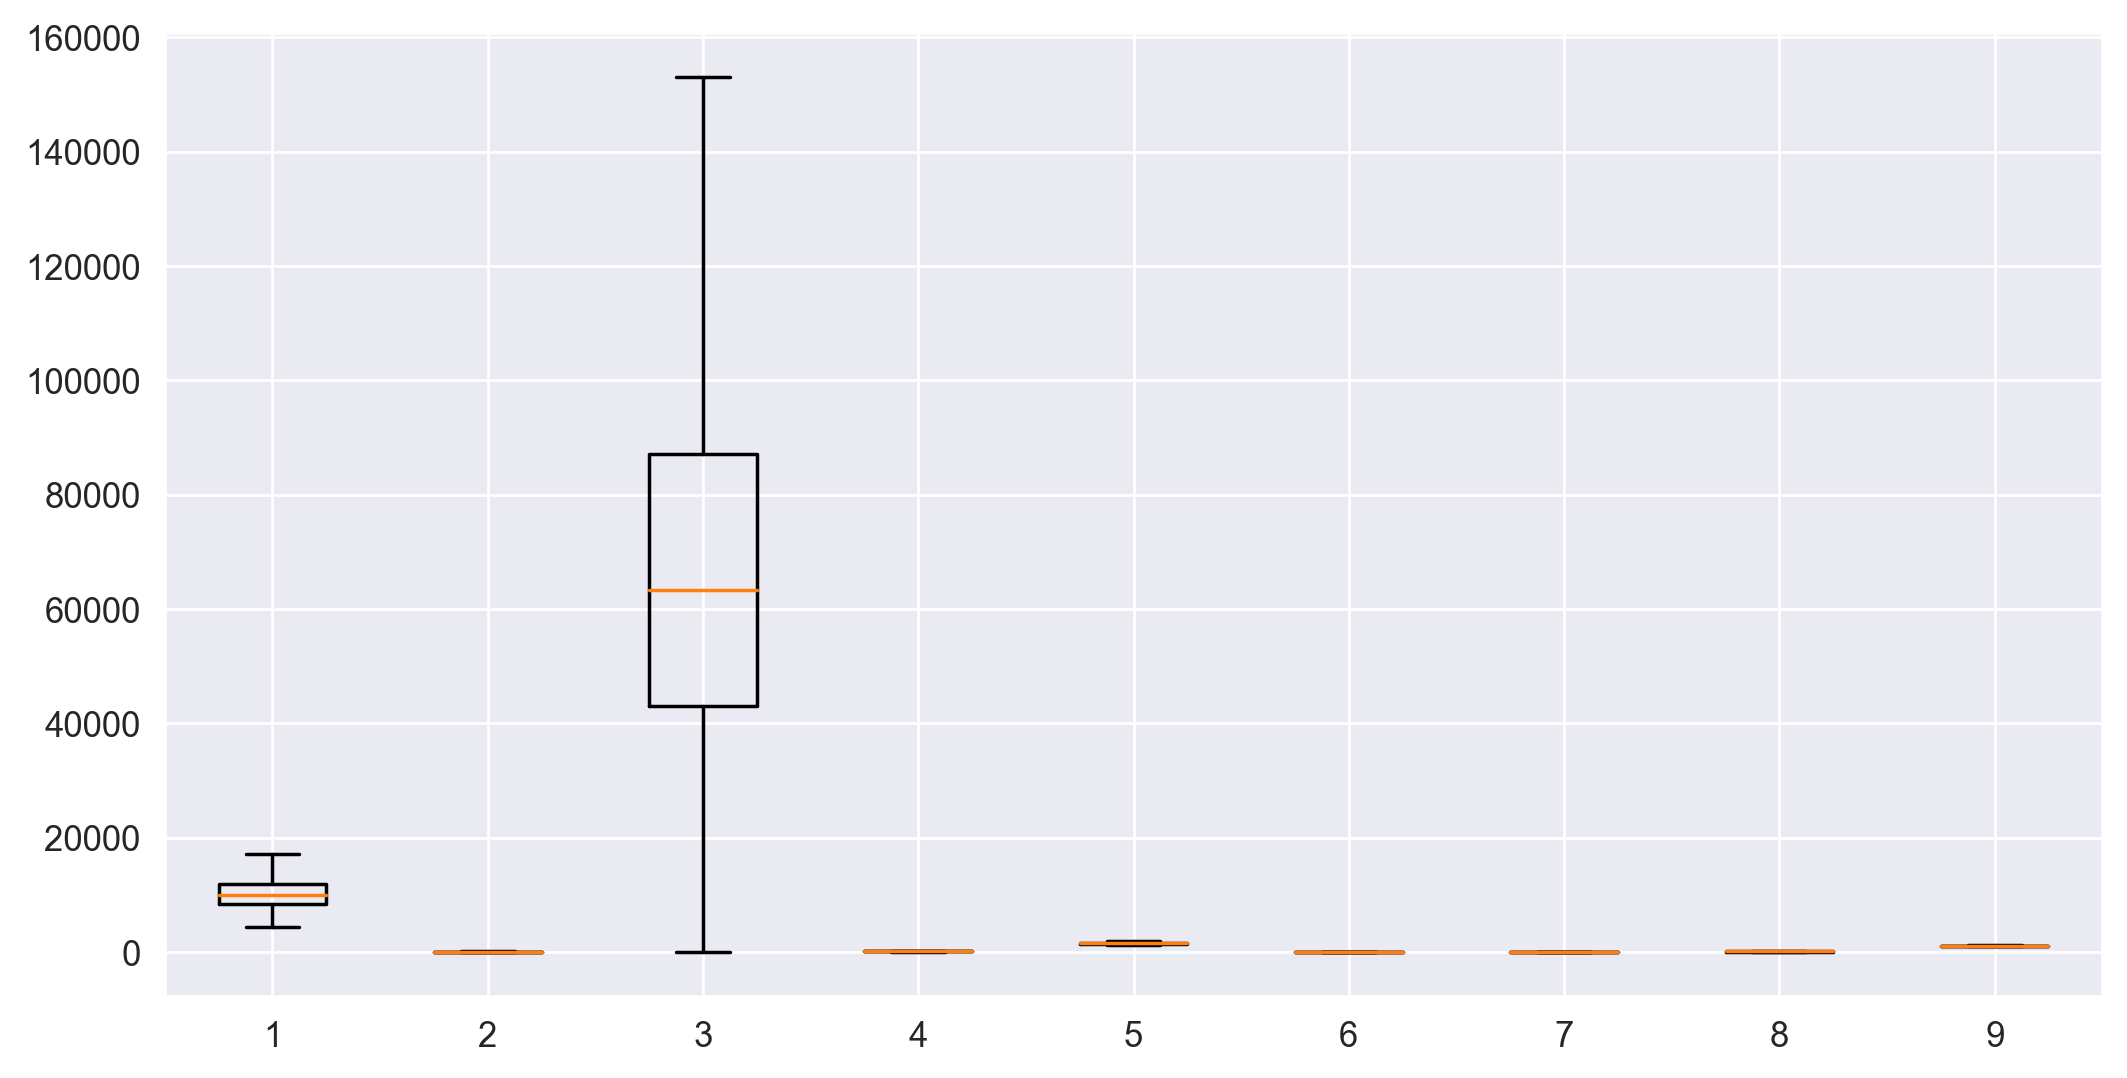

In [59]:
plt.boxplot(corolla)

### Feature Engineering

In [60]:
x = corolla.drop(columns = ['Price'])
y = corolla['Price']

In [61]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [63]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [64]:
ypred = lr.predict(xtest)

In [65]:
ypred

array([11829.02931374, 10848.45819396, 13360.43295809,  7248.63812586,
       12196.97639919, 14736.52271721,  8009.10670828,  9639.0509451 ,
        7444.17874996, 11294.74565462,  9673.63199663,  9661.34548273,
        7799.14486055,  9110.38306852,  7022.62634581,  8546.08517558,
        6431.03056937,  7684.43967965, 16711.04674081,  6358.28288938,
       16079.62386243,  7455.24273083,  9388.1503288 ,  6943.33046365,
       12833.63714548, 15792.24379603,  8263.7568192 , 10395.86721452,
       15804.71136806, 10240.23181666,  8120.41104148,  8341.28629933,
       12875.27123107, 16422.67967177, 18536.68027573, 10163.55519027,
       10629.48072532,  8128.19129203,  9222.0851273 , 16126.4824216 ,
       11809.71955136,  9020.70125329,  8534.0735232 , 10100.28890062,
        8327.27712727,  9880.07328468, 10826.89261426,  9114.48269515,
        6927.45337494,  7317.76352227,  7747.82630069, 10949.5811345 ,
        9305.35466673,  7203.73907518,  8510.70605565, 18449.45248506,
      

In [66]:
mean_squared_error(ytest,ypred)

1204354.788911082

In [67]:
np.sqrt(mean_squared_error(ytest,ypred))

1097.4309950566742

In [68]:
R2_score =round(r2_score(ytest, ypred), 2)
R2_score

0.87

### Model Building using statsmodel library

In [69]:
corolla.head()

Price  Age_08_04       KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986.0  90  1900      3      5            109  1152.5
1  13750         23  72937.0  90  1900      3      5            109  1152.5
2  13950         24  41711.0  90  1900      3      5            109  1152.5
3  14950         26  48000.0  90  1900      3      5            109  1152.5
4  13750         30  38500.0  90  1900      3      5            109  1152.5

In [70]:
import statsmodels.formula.api as smf
model = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight' , data=corolla).fit()
model.params

Intercept       -177.519282
Age_08_04       -106.133437
KM                -0.016043
HP                29.230353
cc                -2.704534
Doors           -108.976879
Gears           -887.596412
Quarterly_Tax     13.508706
Weight            21.308448
dtype: float64

In [71]:
model.rsquared , model.rsquared_adj

(0.8665906185788732, 0.8659366510228873)

### Calculate VIF

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
data = corolla.drop(columns=['Price'])
data

Age_08_04       KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0            23  46986.0   90  1900      3      5            109  1152.5
1            23  72937.0   90  1900      3      5            109  1152.5
2            24  41711.0   90  1900      3      5            109  1152.5
3            26  48000.0   90  1900      3      5            109  1152.5
4            30  38500.0   90  1900      3      5            109  1152.5
...         ...      ...  ...   ...    ...    ...            ...     ...
1431         69  20544.0   86  1300      3      5             69  1025.0
1432         72  19000.0   86  1300      3      5             69  1015.0
1433         71  17016.0   86  1300      3      5             69  1015.0
1434         70  16916.0   86  1300      3      5             69  1015.0
1435         76      1.0  110  1600      5      5             45  1114.0

[1436 rows x 8 columns]

In [74]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [75]:
vif['Features'] = data.columns
vif

Features
0      Age_08_04
1             KM
2             HP
3             cc
4          Doors
5          Gears
6  Quarterly_Tax
7         Weight

In [76]:
data.values

array([[2.3000e+01, 4.6986e+04, 9.0000e+01, ..., 5.0000e+00, 1.0900e+02,
        1.1525e+03],
       [2.3000e+01, 7.2937e+04, 9.0000e+01, ..., 5.0000e+00, 1.0900e+02,
        1.1525e+03],
       [2.4000e+01, 4.1711e+04, 9.0000e+01, ..., 5.0000e+00, 1.0900e+02,
        1.1525e+03],
       ...,
       [7.1000e+01, 1.7016e+04, 8.6000e+01, ..., 5.0000e+00, 6.9000e+01,
        1.0150e+03],
       [7.0000e+01, 1.6916e+04, 8.6000e+01, ..., 5.0000e+00, 6.9000e+01,
        1.0150e+03],
       [7.6000e+01, 1.0000e+00, 1.1000e+02, ..., 5.0000e+00, 4.5000e+01,
        1.1140e+03]])

In [77]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

Features          VIF
0      Age_08_04     2.128346
1             KM     1.929133
2             HP     1.316754
3             cc     2.985918
4          Doors     1.296200
5          Gears  2288.890967
6  Quarterly_Tax     1.955063
7         Weight     4.021034

In [73]:
dict2 = {"R2_Score_linear_regression_model" : [0.87] , "R2_Score_StatsModel_model": [0.86],
         }
R2_Score_df2 = pd.DataFrame(dict2)
R2_Score_df2

R2_Score_linear_regression_model  R2_Score_StatsModel_model
0                              0.87                       0.86